<a href="https://colab.research.google.com/github/ThiagoBalbo16/Course-DDS4-FLAI/blob/main/Class_11_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course: Curso Dominando Data Science [FLAI] \\
Description: Churn Modelling \\
Author: FLAI \\
Adapted by : Thiago Balbo Batista \\
Year: 2021

#### Importing and Preparing the Data

In [ ]:
# Import the dataset via github:

import pandas as pd
url = 'https://raw.githubusercontent.com/ThiagoBalbo16/Course-DDS4-FLAI/main/Churn_Modelling.csv'
data = pd.read_csv(url)
data.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

In [ ]:
# Counting the surnames in the dataframe:

data['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
De Garis     1
Burson       1
Garland      1
Vidal        1
Donoghue     1
Name: Surname, Length: 2932, dtype: int64

In [ ]:
# Define the features variables and the target variable.

X = data.drop(['Exited'], axis = 1) 

y = data['Exited']

In [ ]:
X.head()

RowNumber  CustomerId   Surname  ...  HasCrCard IsActiveMember EstimatedSalary
0          1    15634602  Hargrave  ...          1              1       101348.88
1          2    15647311      Hill  ...          0              1       112542.58
2          3    15619304      Onio  ...          1              0       113931.57
3          4    15701354      Boni  ...          0              0        93826.63
4          5    15737888  Mitchell  ...          1              1        79084.10

[5 rows x 13 columns]

#### Exploratory Data Analysis

In [ ]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 175 kB/s 
     |████████████████████████████████| 76 kB 4.3 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import sweetviz as sv

In [ ]:
eda = sv.analyze(source = data, 
                 target_feat = 'Exited')

                                             |          | [  0%]   00:00 -> (? left)


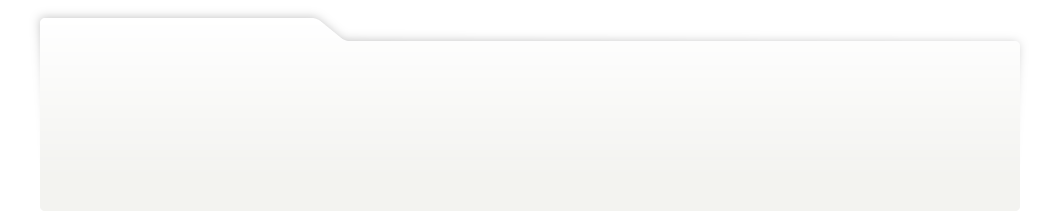
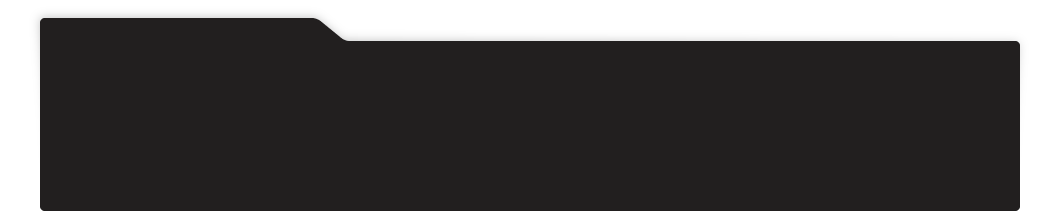
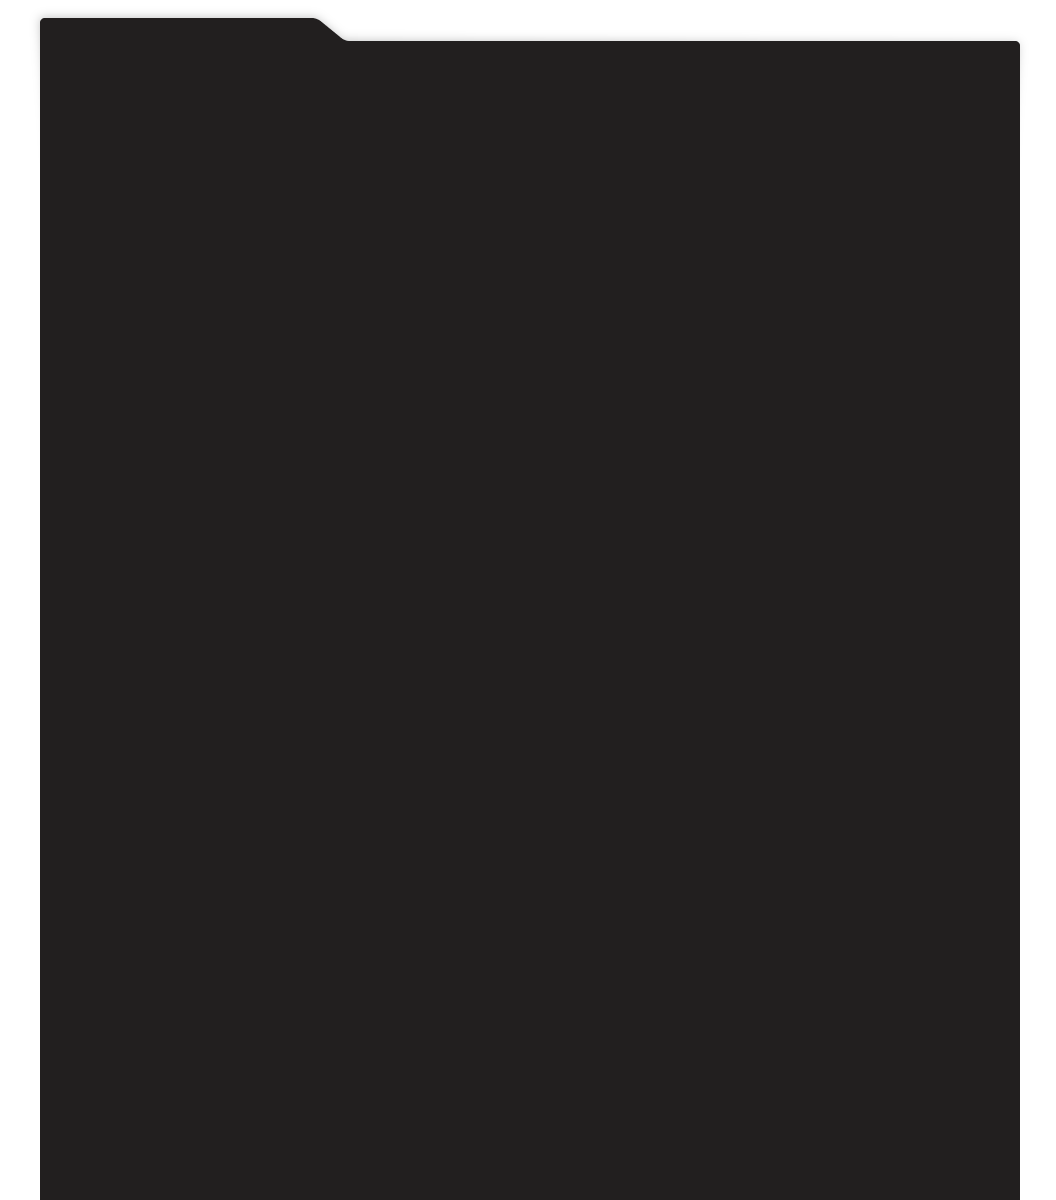
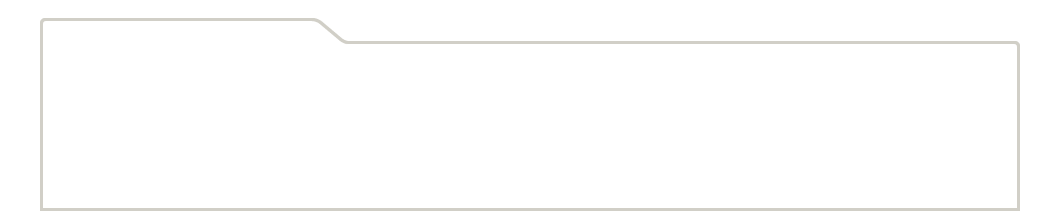
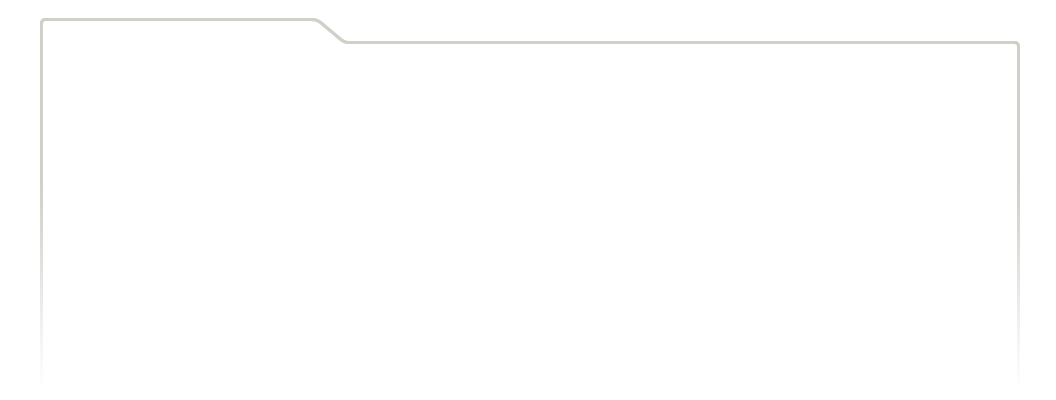
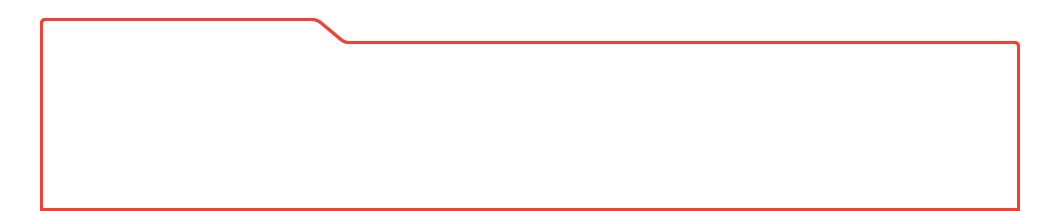
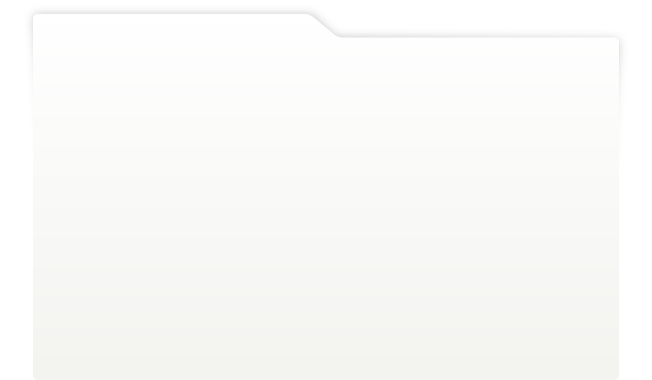
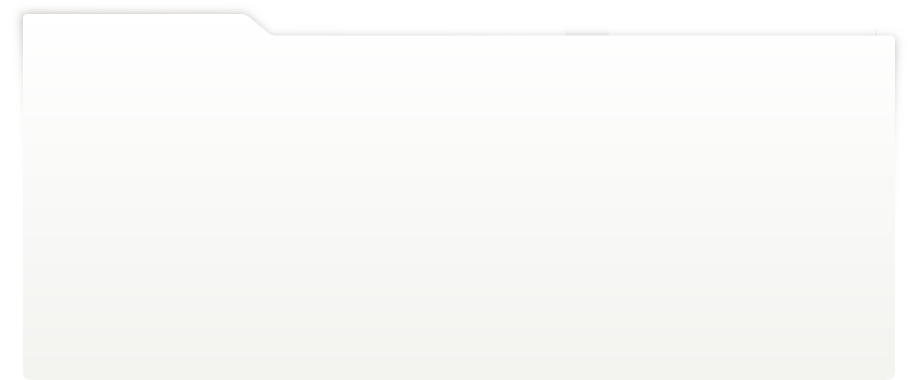
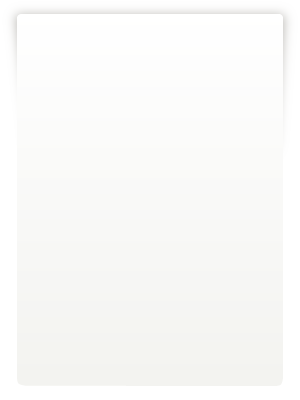
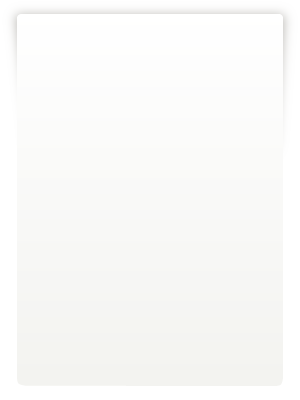
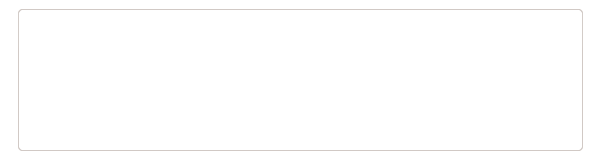
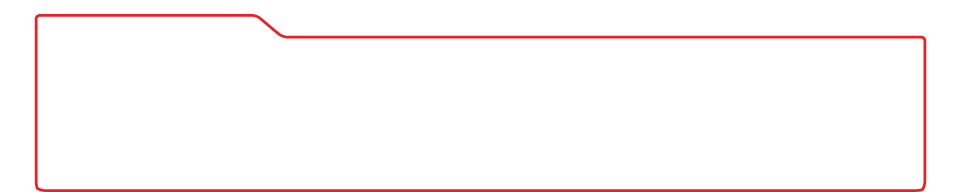
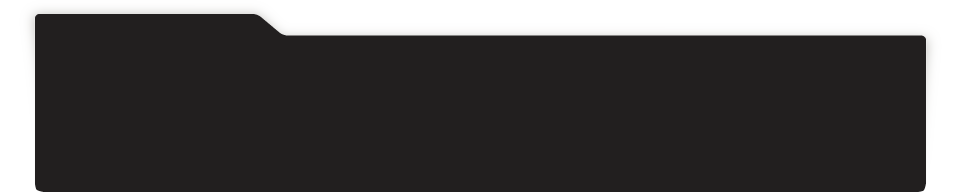
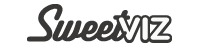
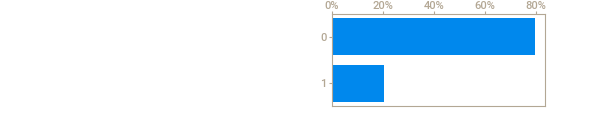
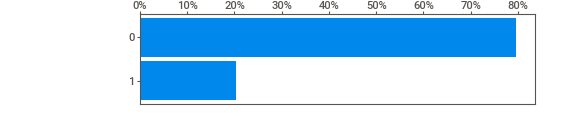
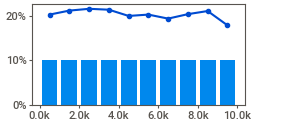
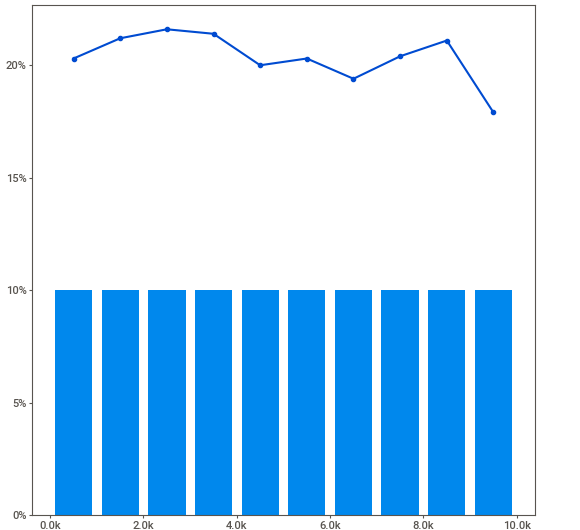
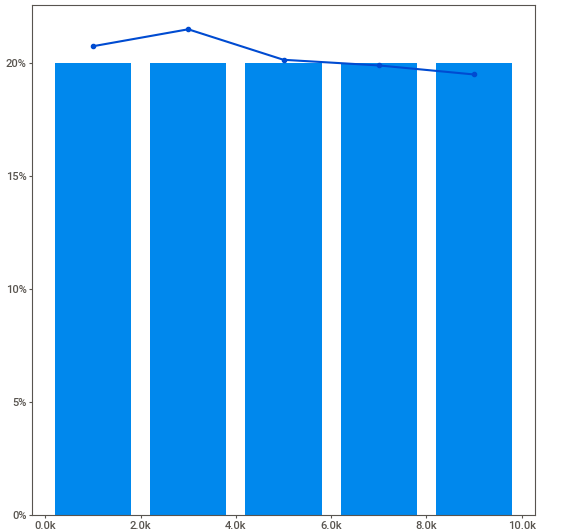
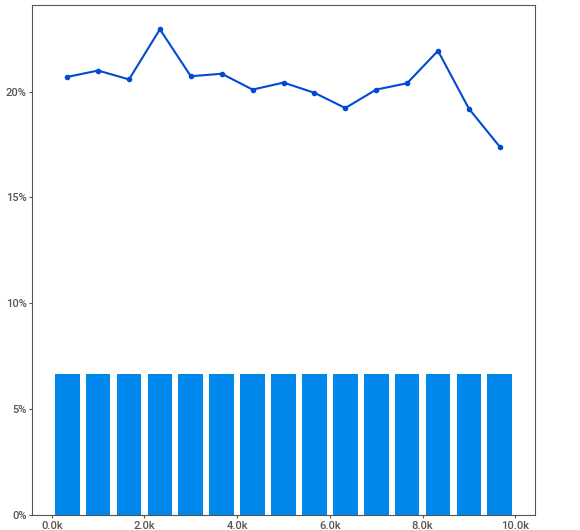
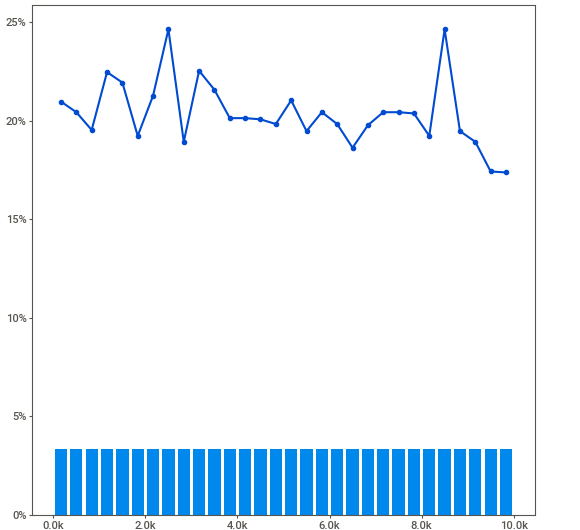
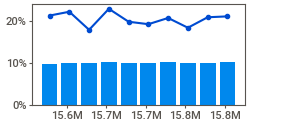
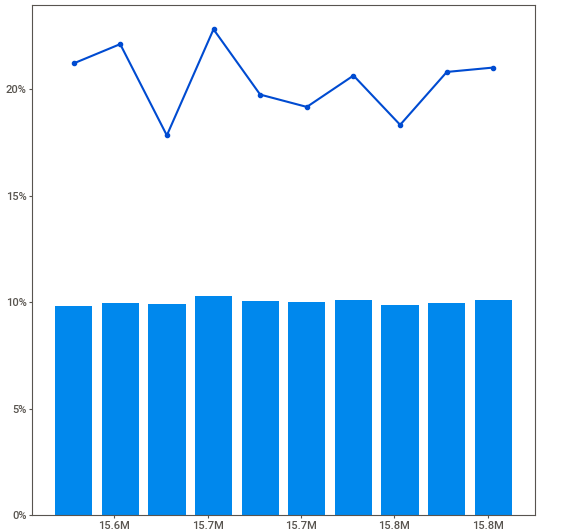
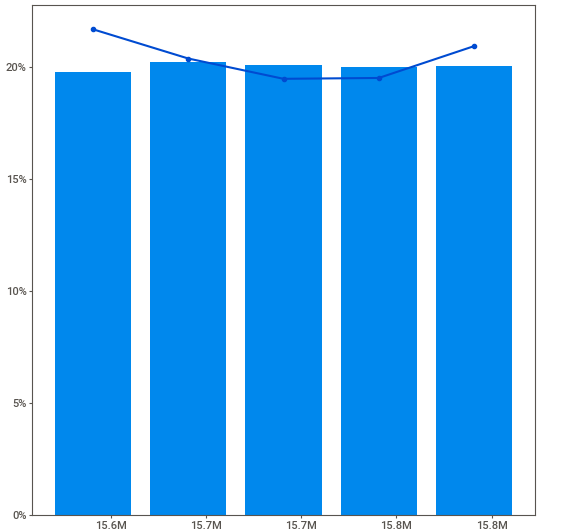
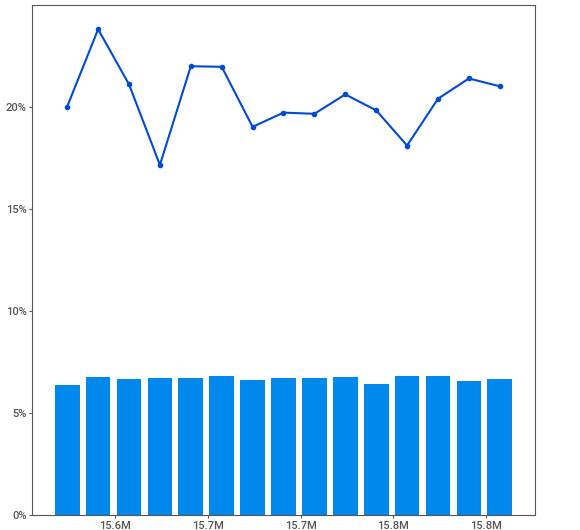
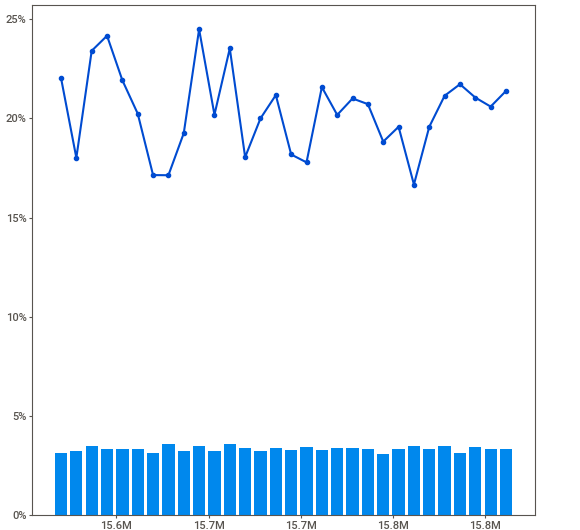
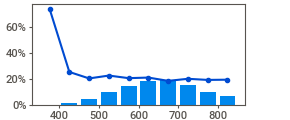
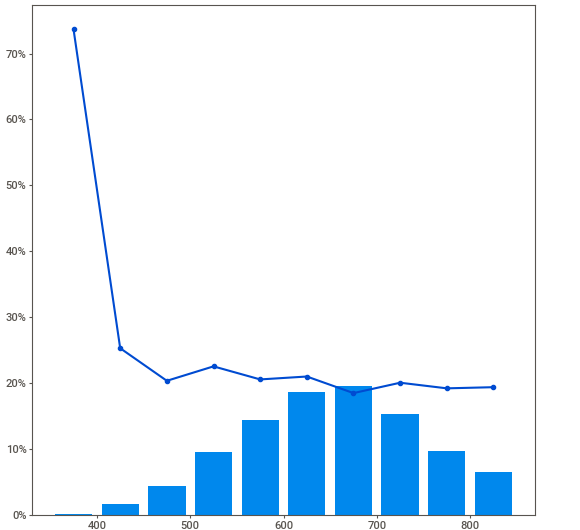
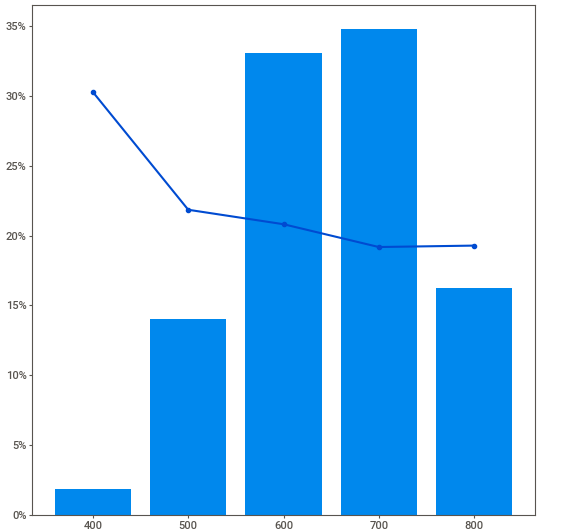
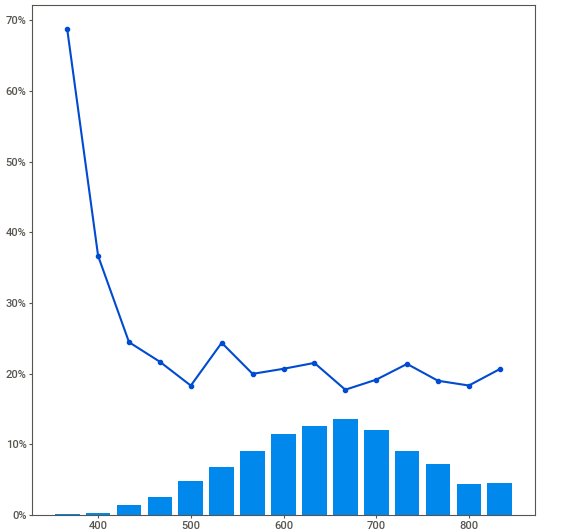
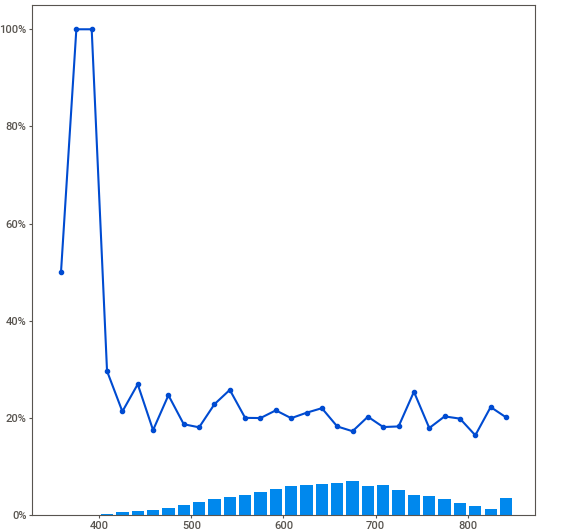
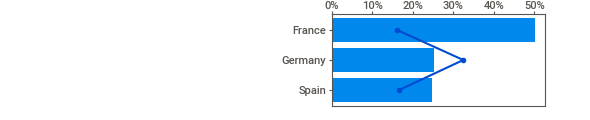
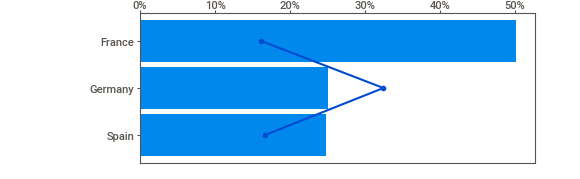
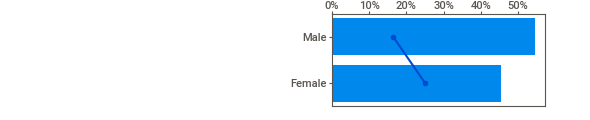
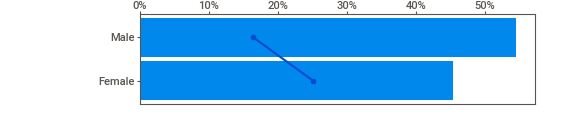
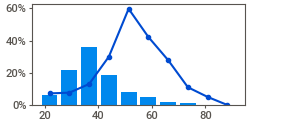
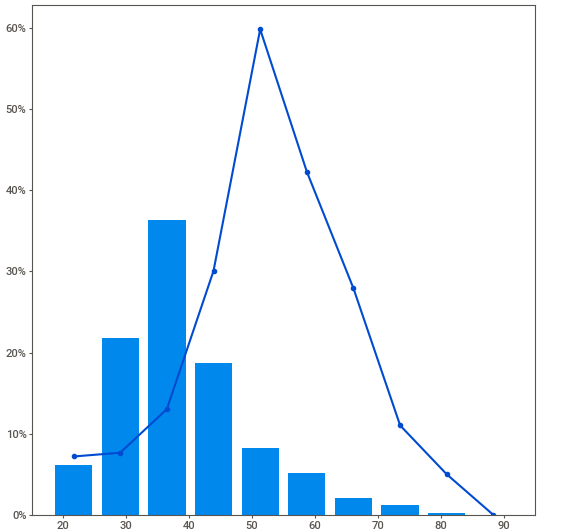
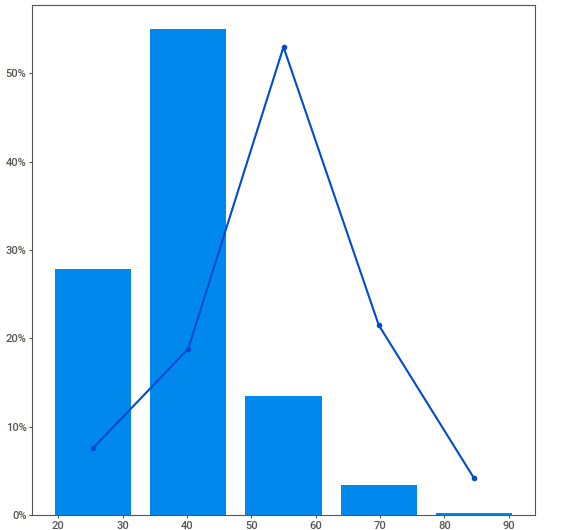
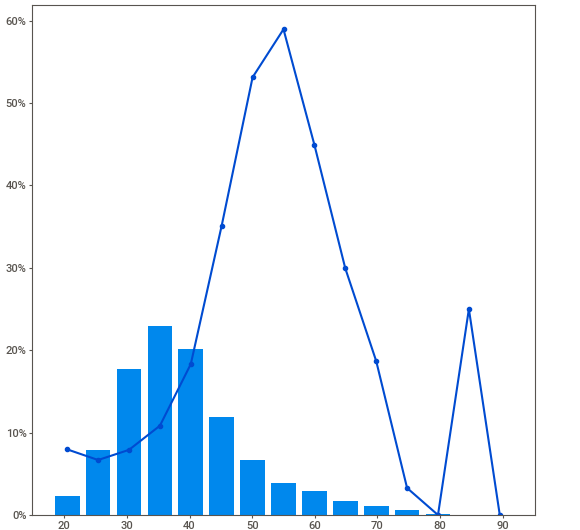
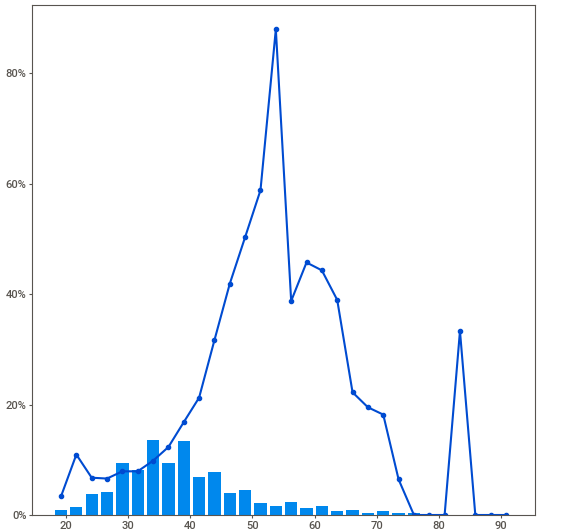
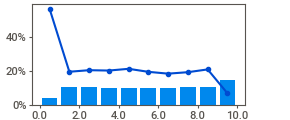
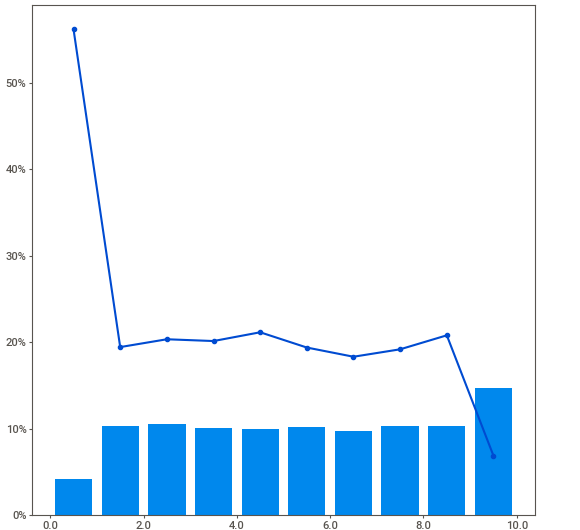
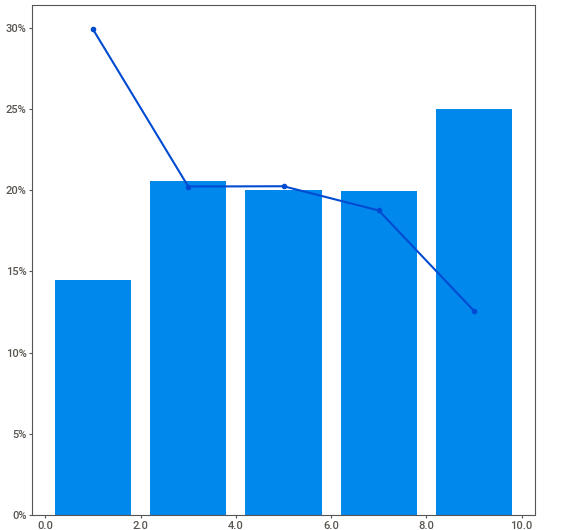
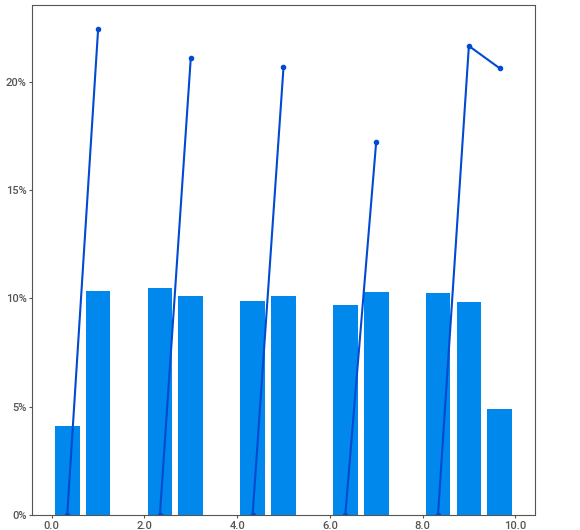
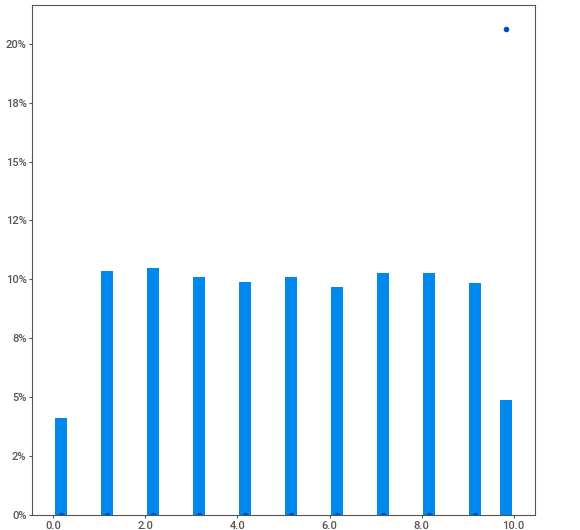
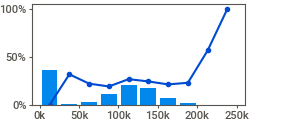
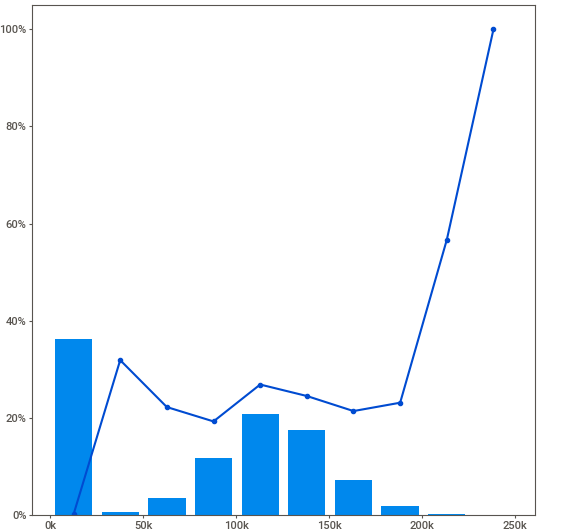
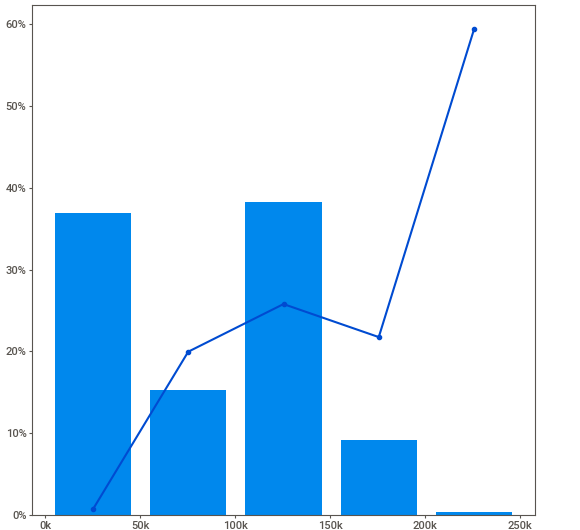
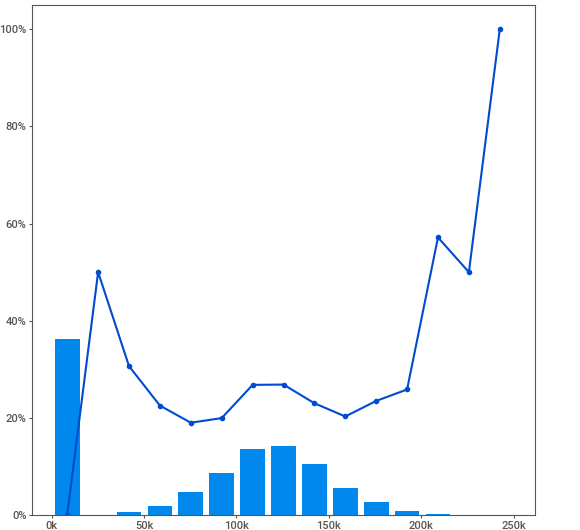
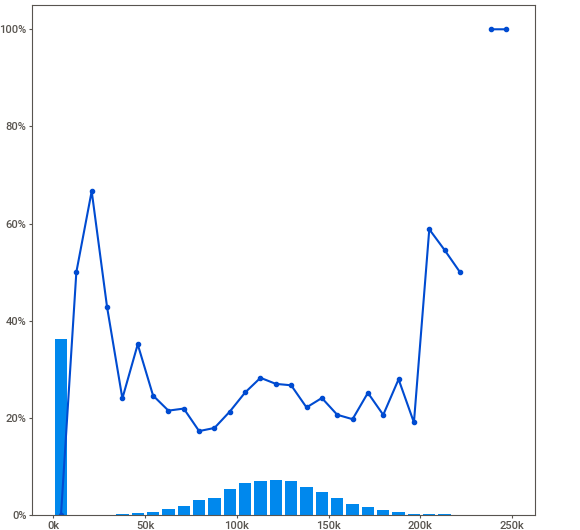
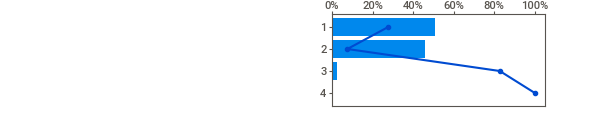
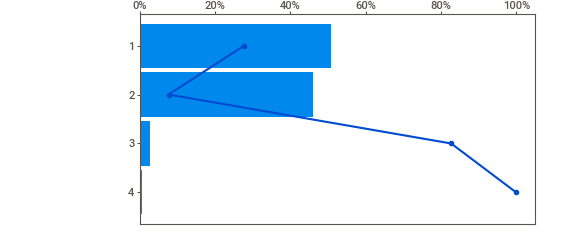
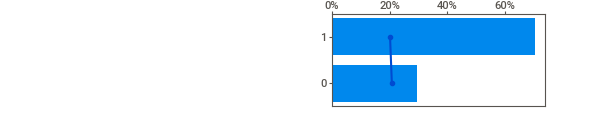
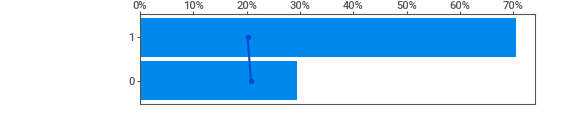
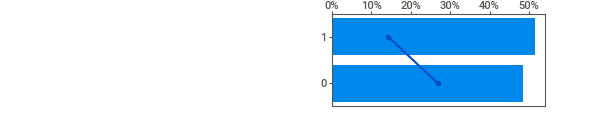
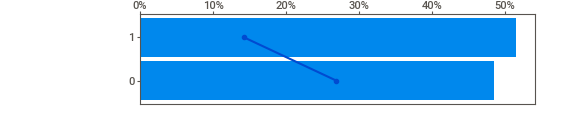
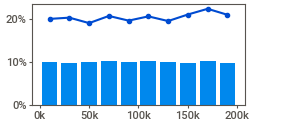
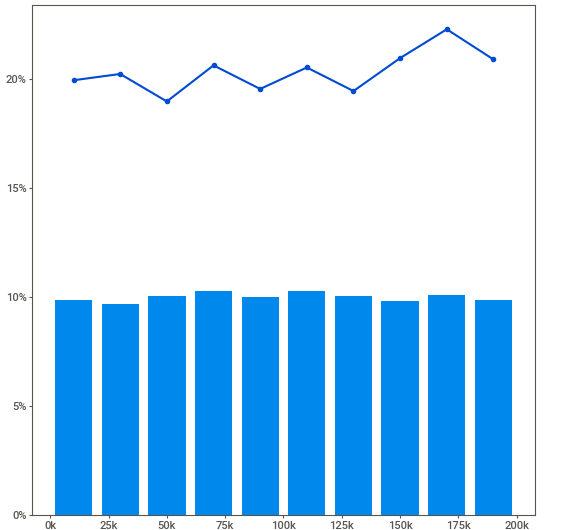
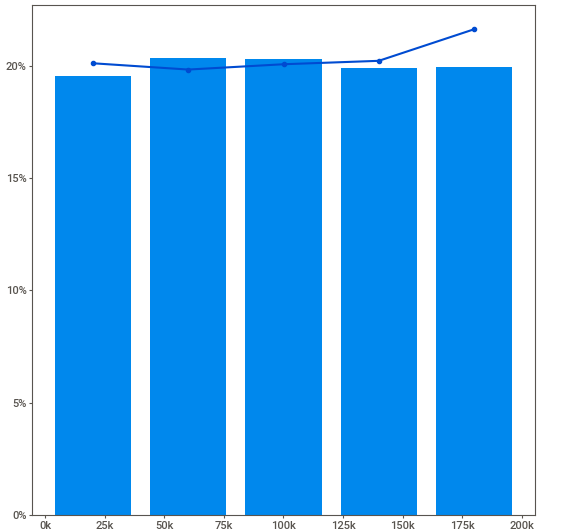
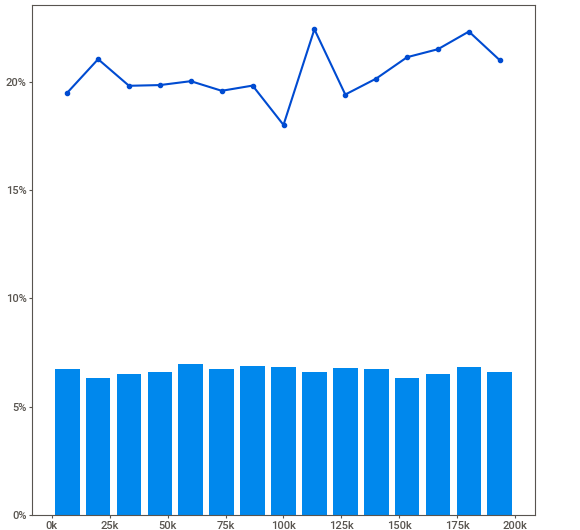
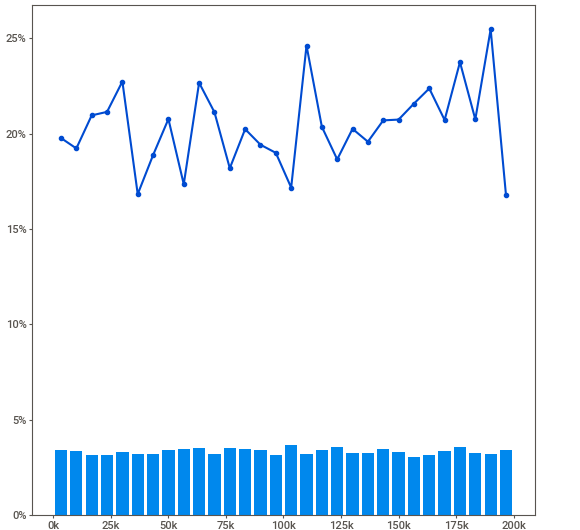
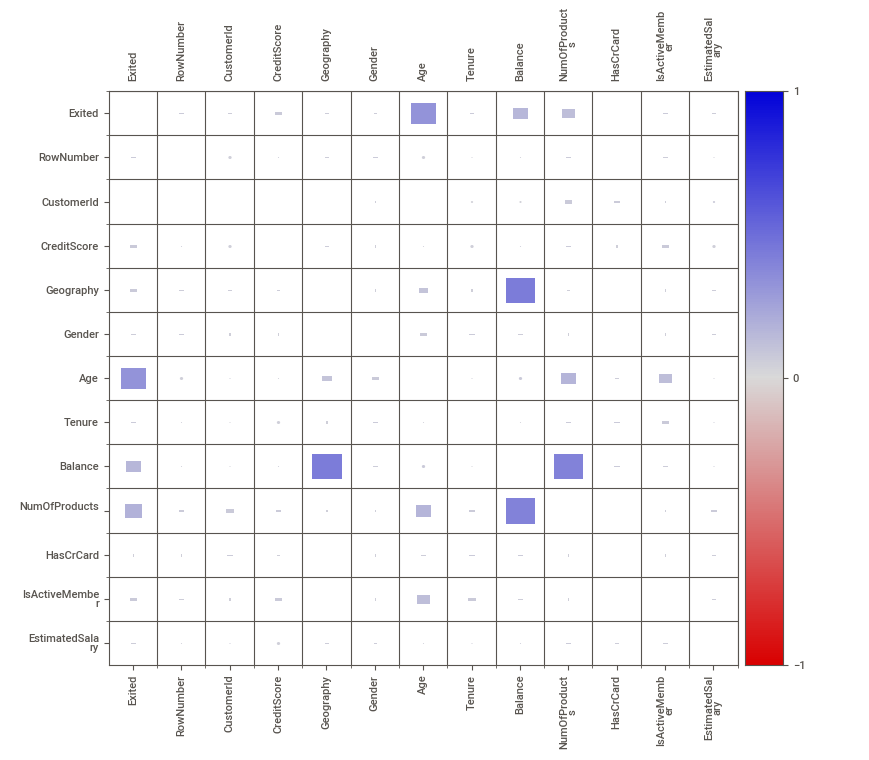
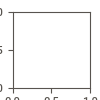

In [ ]:
eda.show_notebook()

#### Pre-processing the Data in Machine Learning

##### First Step: Discard the unnecessary variables

In [ ]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [ ]:
data.head()

CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619    France  Female  ...               1        101348.88       1
1          608     Spain  Female  ...               1        112542.58       0
2          502    France  Female  ...               0        113931.57       1
3          699    France  Female  ...               0         93826.63       0
4          850     Spain  Female  ...               1         79084.10       0

[5 rows x 11 columns]

##### Second Step: Check the Null Values





In [ ]:
# Checking the columns with null values

data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
import missingno as missing

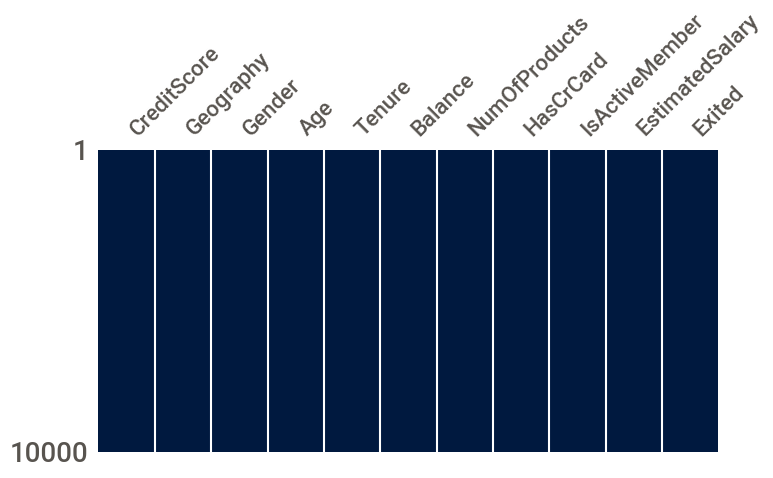

In [ ]:
# Check the null values with the graphic:

missing.matrix(data, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

##### Third Step: Categorizing continuous variables

In [ ]:
# Checking the distribution of the 'Balance' variable :

data['Balance'].plot(kind = 'hist', edgecolor = 'black')

[]

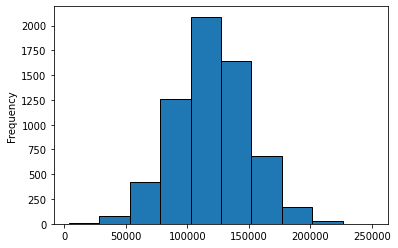

In [ ]:
# Checking the 'Balance' variable without the empty accounts: 

data[data['Balance'] > 0]['Balance'].plot(kind = 'hist', edgecolor = 'black').plot(kind = 'hist', edgecolor = 'black')

In [ ]:
# The exploratory analysis of this variable without the empty accounts:

data[data['Balance'] > 0]['Balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

In [ ]:
import numpy as np

In [ ]:
# Categorizing the 'Balance' variable by values intervals:

def aux(x):
    if x == 0:
        return '0'
    elif x < 100000:
        return '0 - 100.000'
    elif x < 150000:
        return '100.000 - 150.000'
    else:
        return 'more than 150.000'

data['Balance'].astype(np.float64)

data['Balance'] = data['Balance'].apply(aux)
data.head()

CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary Exited
0          619    France  Female  ...               1        101348.88      1
1          608     Spain  Female  ...               1        112542.58      0
2          502    France  Female  ...               0        113931.57      1
3          699    France  Female  ...               0         93826.63      0
4          850     Spain  Female  ...               1         79084.10      0

[5 rows x 11 columns]

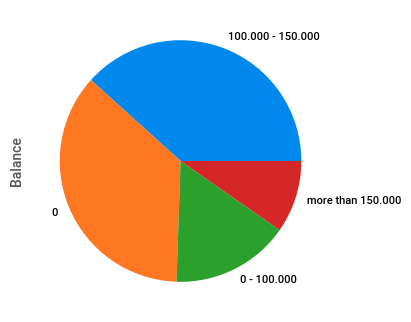

In [ ]:
# Counting the new categories:

data['Balance'].value_counts().plot(kind ='pie')

##### Fifth Step: Grouping Categories

In [ ]:
data.head()

CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary Exited
0          619    France  Female  ...               1        101348.88      1
1          608     Spain  Female  ...               1        112542.58      0
2          502    France  Female  ...               0        113931.57      1
3          699    France  Female  ...               0         93826.63      0
4          850     Spain  Female  ...               1         79084.10      0

[5 rows x 11 columns]

In [ ]:
# Counting the 'Tenure' variable:

data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [ ]:
# Categorizing the 'Tenure' variable:

def aux(x):
    if x <= 3:
        return '0-3'
    elif x <= 6:
        return '4-6'
    else:
        return '7-10'

data['Tenure'] = data['Tenure'].apply(aux)

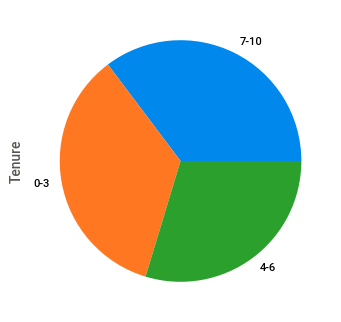

In [ ]:
# Counting the categorized 'Tenure' variable:

data['Tenure'].value_counts().plot(kind = 'pie');

In [ ]:
# Counting the Number of Products:

data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
# Categorizing the 'NumOfProducts' variable:

def auxiliar(x):
    if x == 1:
        return '1 product'
    else:
        return '2 products or more'

data['NumOfProducts'] = data['NumOfProducts'].apply(auxiliar)

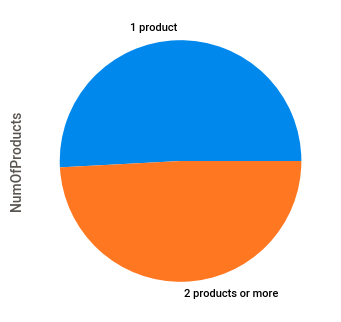

In [ ]:
# Counting the categorized 'NumOfProducts' variable:

data['NumOfProducts'].value_counts().plot(kind = 'pie');

In [ ]:
data.head()

CreditScore Geography  Gender  ...  IsActiveMember EstimatedSalary Exited
0          619    France  Female  ...               1       101348.88      1
1          608     Spain  Female  ...               1       112542.58      0
2          502    France  Female  ...               0       113931.57      1
3          699    France  Female  ...               0        93826.63      0
4          850     Spain  Female  ...               1        79084.10      0

[5 rows x 11 columns]

##### Sixth Step: Define the variables as dummies

In [ ]:
# Example

pd.get_dummies(data['Tenure'])

0-3  4-6  7-10
0       1    0     0
1       1    0     0
2       0    0     1
3       1    0     0
4       1    0     0
...   ...  ...   ...
9995    0    1     0
9996    0    0     1
9997    0    0     1
9998    1    0     0
9999    0    1     0

[10000 rows x 3 columns]

In [ ]:
# Turning the categorized variables in dummy:

variables_cat = ['Geography', 'Gender', 'Tenure', 'Balance', 'NumOfProducts']
data = pd.get_dummies(data, columns = variables_cat, drop_first = True)

In [ ]:
data.head()

CreditScore  ...  NumOfProducts_2 products or more
0          619  ...                                 0
1          608  ...                                 0
2          502  ...                                 1
3          699  ...                                 1
4          850  ...                                 0

[5 rows x 15 columns]

##### Seventh Step: Changing the Scale of Continuous Variables

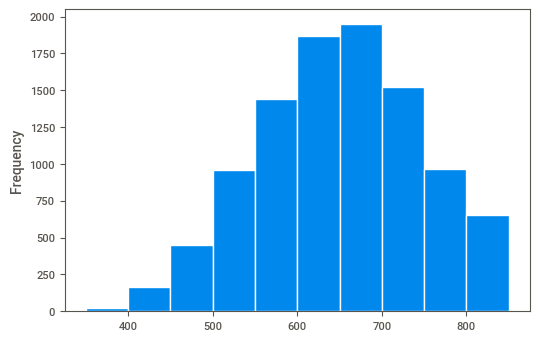

In [ ]:
data['CreditScore'].plot(kind = 'hist', edgecolor = 'white')

In [ ]:
# Changing the scale of the 'CreditScore' variable: 

data['CreditScore'] = data['CreditScore']/1000

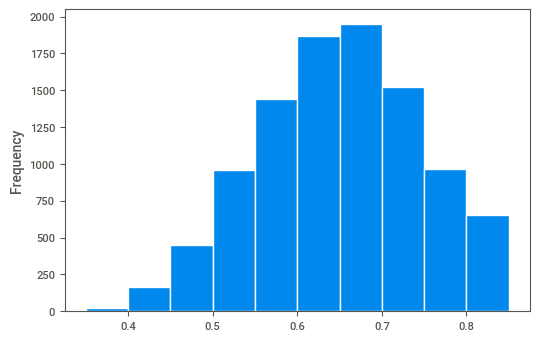

In [ ]:
data['CreditScore'].plot(kind = 'hist', edgecolor = 'white');

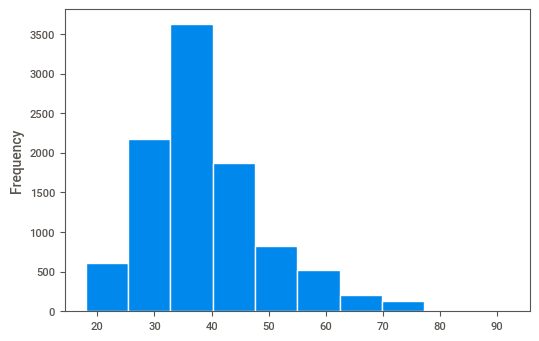

In [ ]:
data['Age'].plot(kind = 'hist', edgecolor = 'white');

In [ ]:
# Changing the scale of the 'Age' variable

m = np.mean(data['Age'])
dev = np.std(data['Age'])
data['Age'] = (data['Age'] - m)/dev

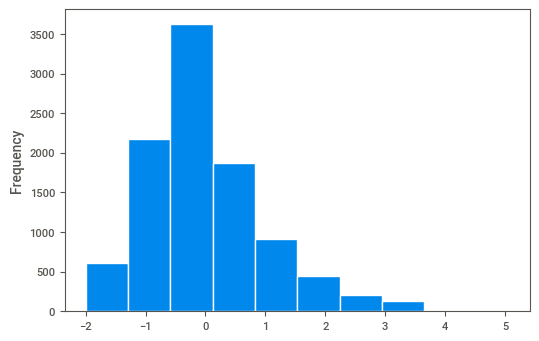

In [ ]:
data['Age'].plot(kind = 'hist', edgecolor = 'white');

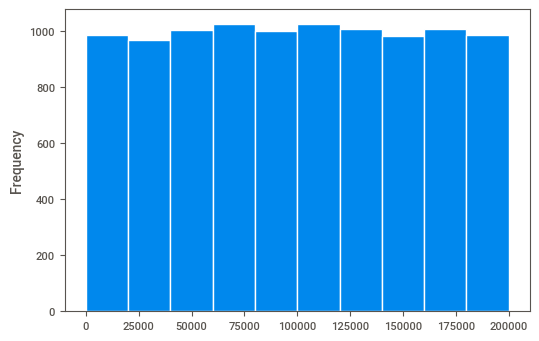

In [ ]:
data['EstimatedSalary'].plot(kind = 'hist', edgecolor = 'white');

In [ ]:
# Changing the scale of the 'EstimatedSalary' variable:

data['EstimatedSalary'] = data['EstimatedSalary']/100000

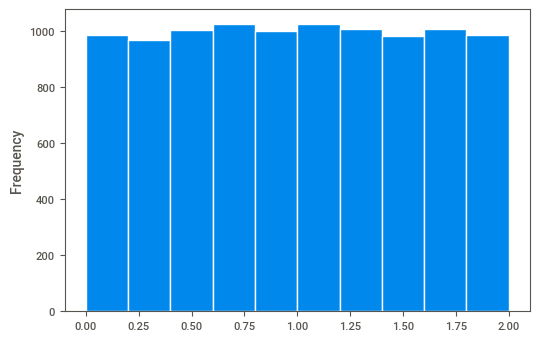

In [ ]:
data['EstimatedSalary'].plot(kind = 'hist', edgecolor = 'white');

In [ ]:
data.head()

CreditScore  ...  NumOfProducts_2 products or more
0        0.619  ...                                 0
1        0.608  ...                                 0
2        0.502  ...                                 1
3        0.699  ...                                 1
4        0.850  ...                                 0

[5 rows x 15 columns]

In [ ]:
data.describe()

CreditScore  ...  NumOfProducts_2 products or more
count  10000.000000  ...                      10000.000000
mean       0.650529  ...                          0.491600
std        0.096653  ...                          0.499954
min        0.350000  ...                          0.000000
25%        0.584000  ...                          0.000000
50%        0.652000  ...                          0.000000
75%        0.718000  ...                          1.000000
max        0.850000  ...                          1.000000

[8 rows x 15 columns]

##### Reviewing the Exploratory Analysis

                                             |          | [  0%]   00:00 -> (? left)


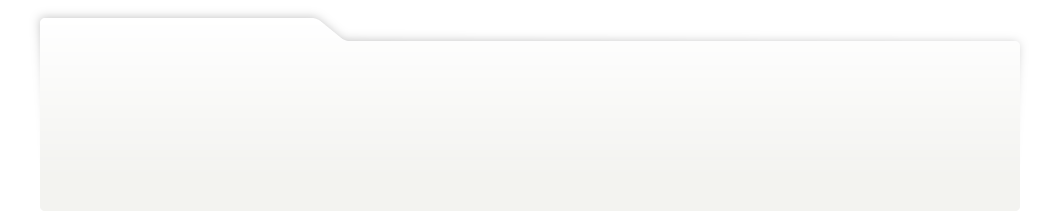
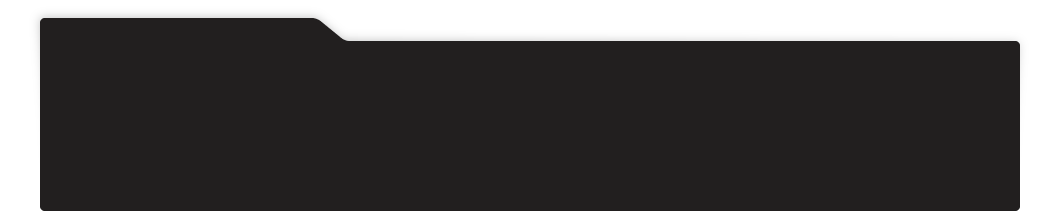
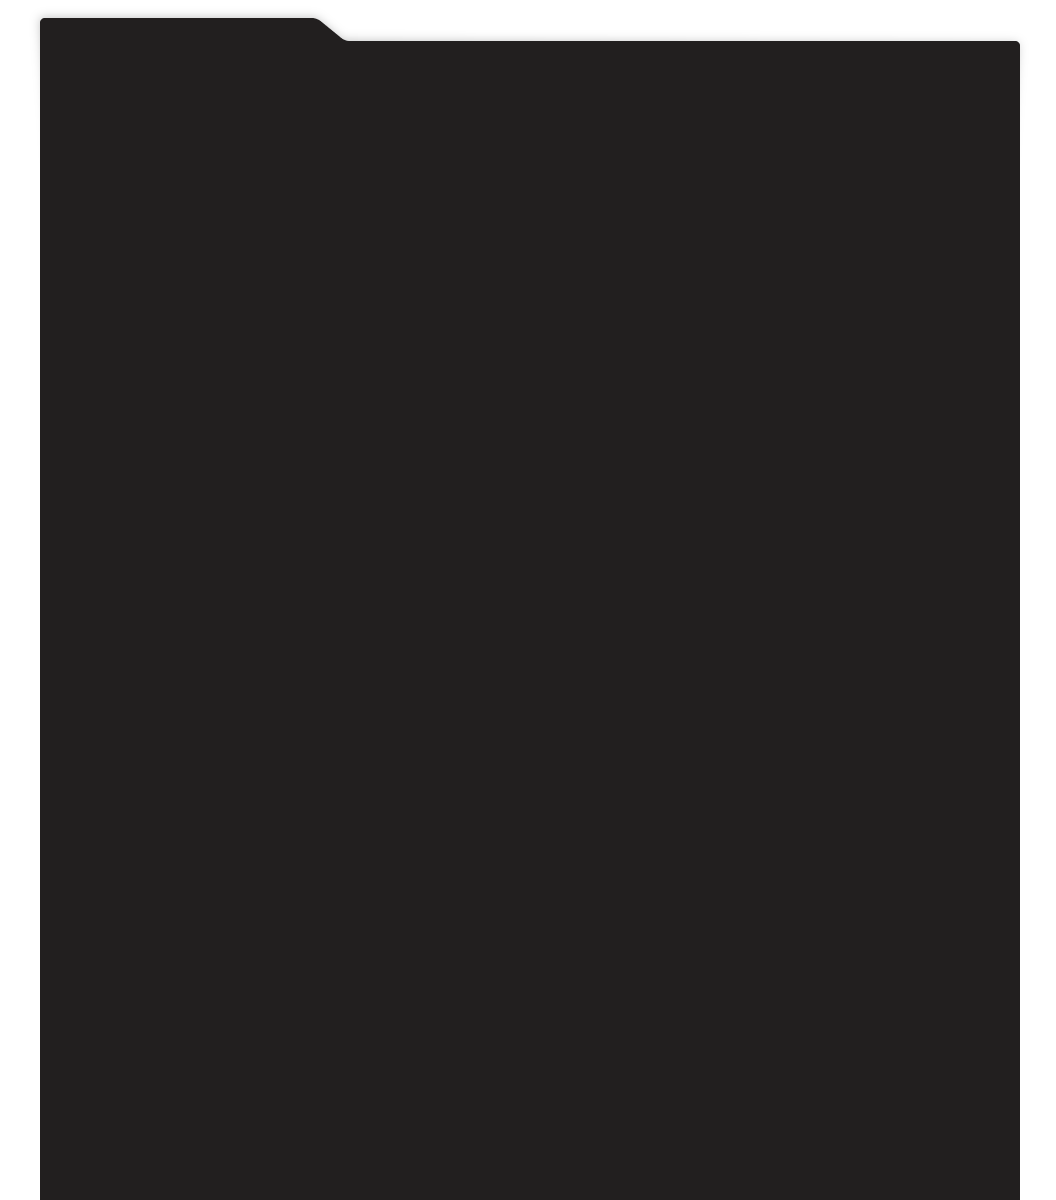
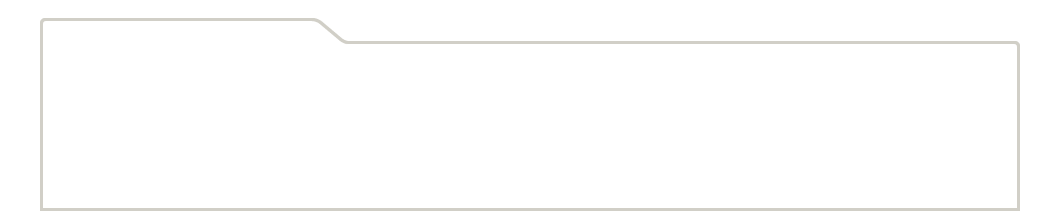
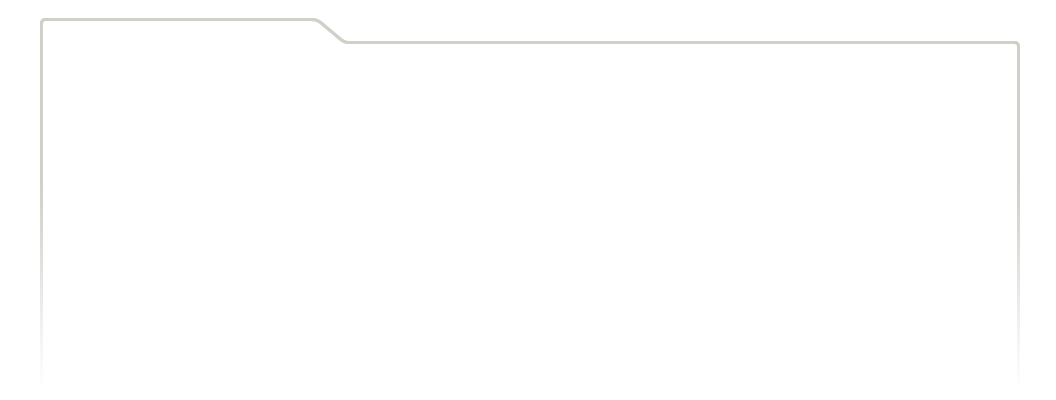
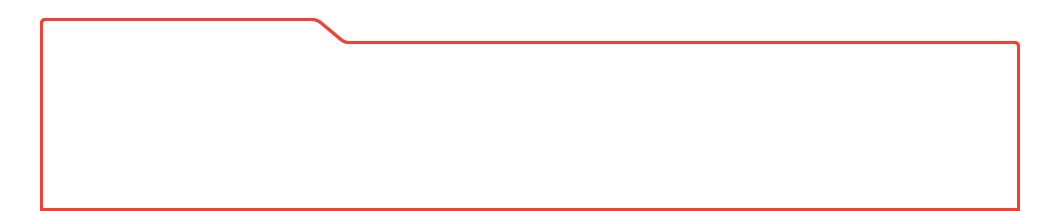
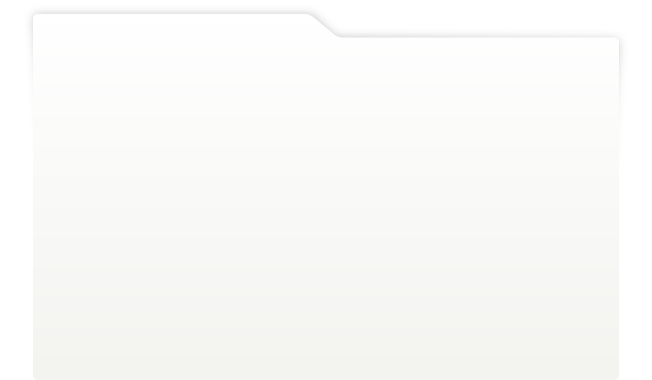
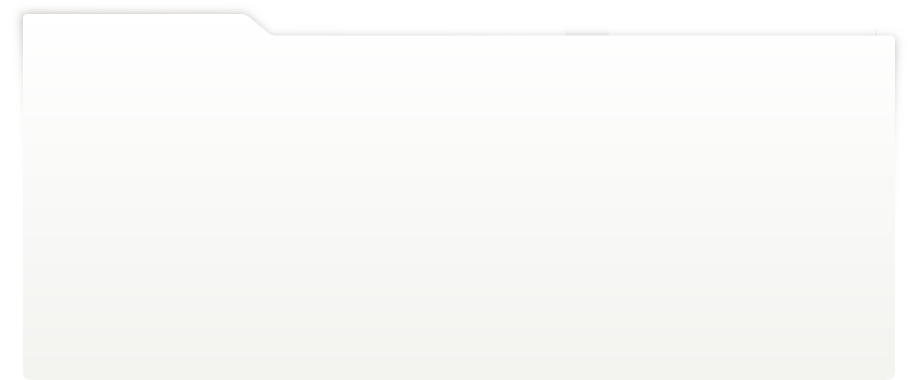
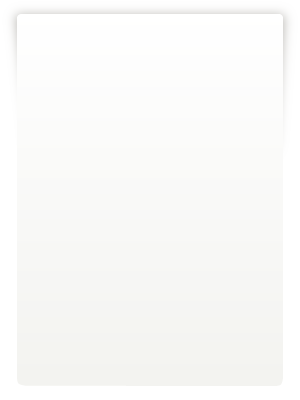
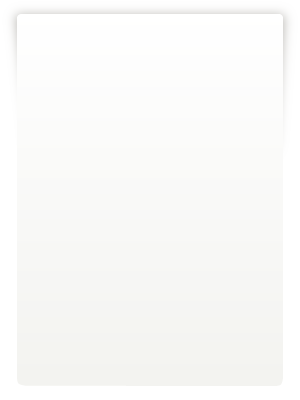
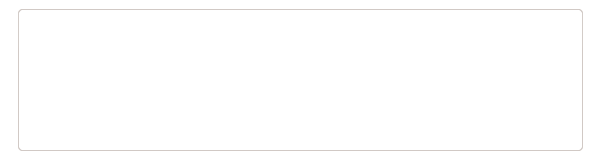
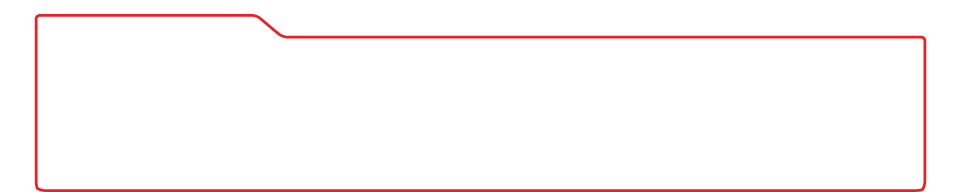
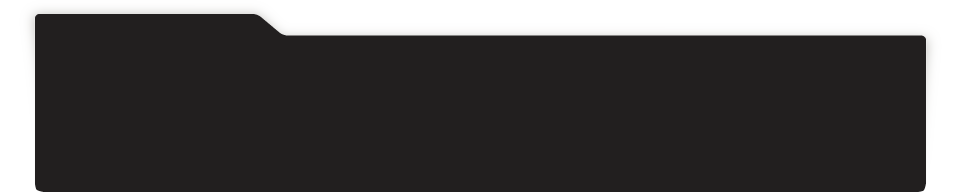
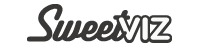
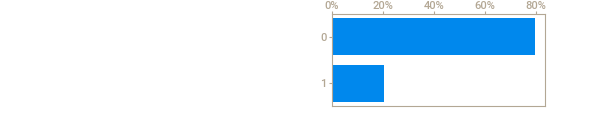
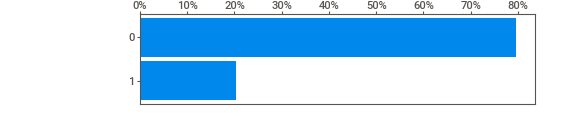
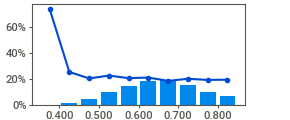
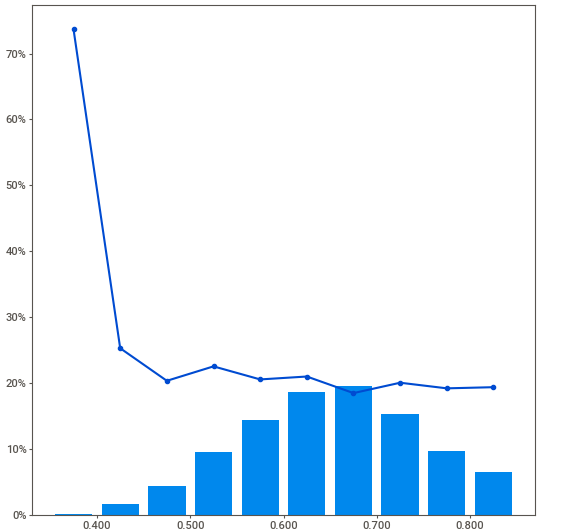
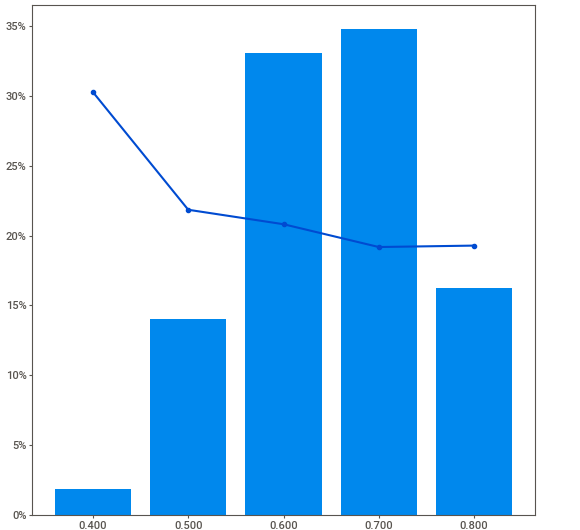
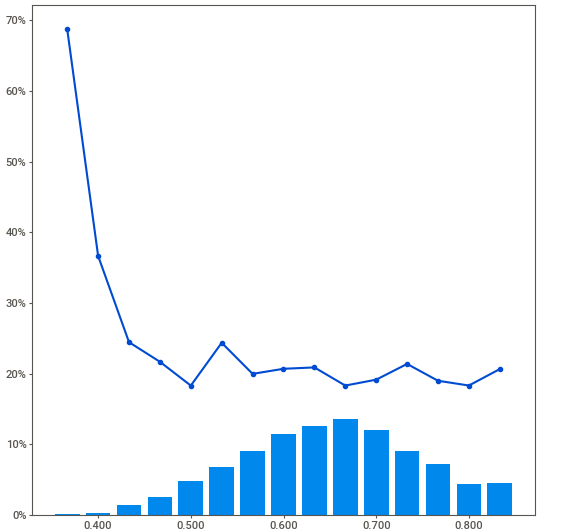
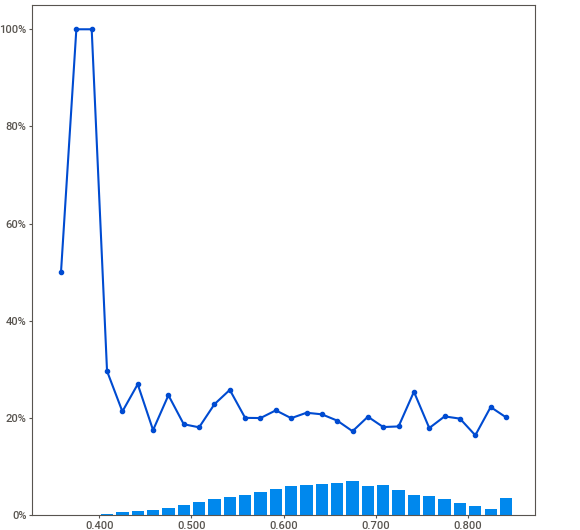
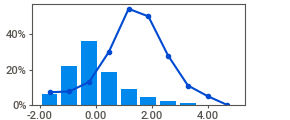
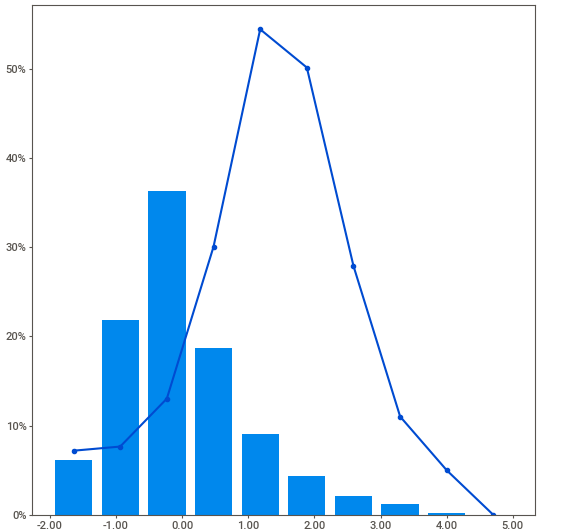
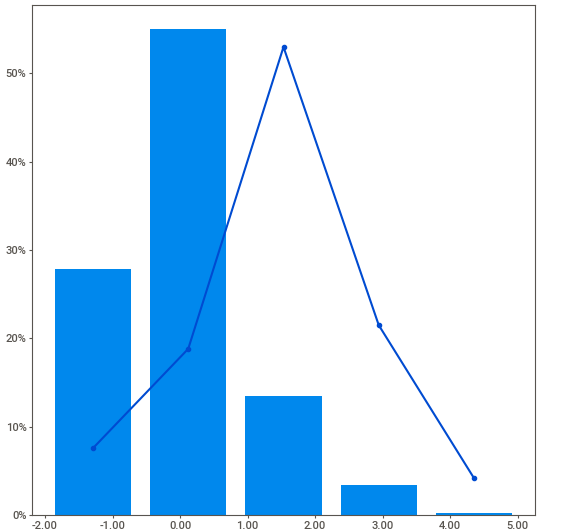
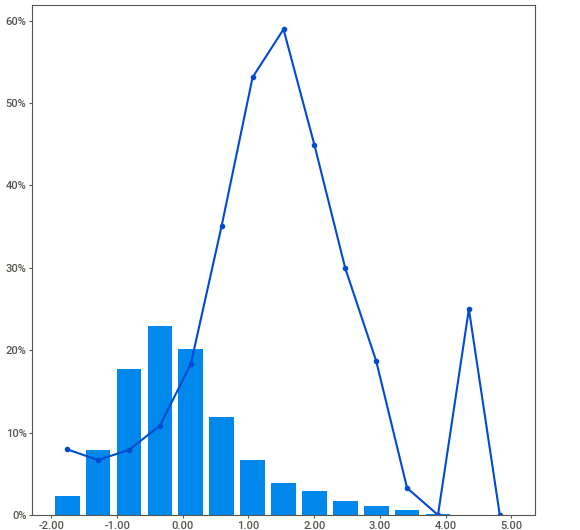
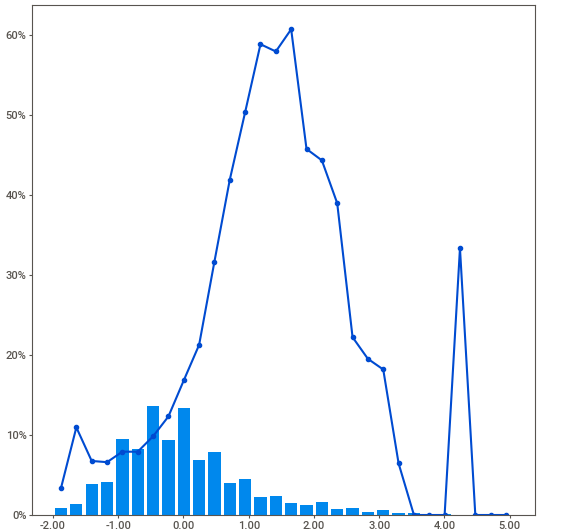
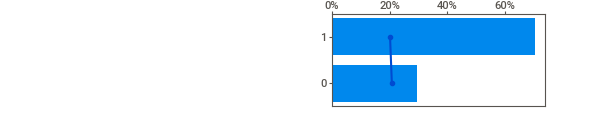
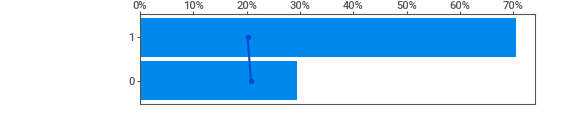
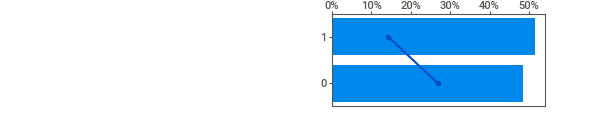
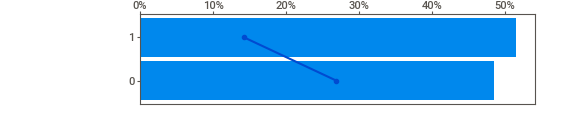
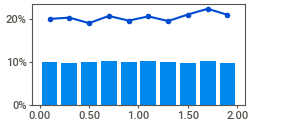
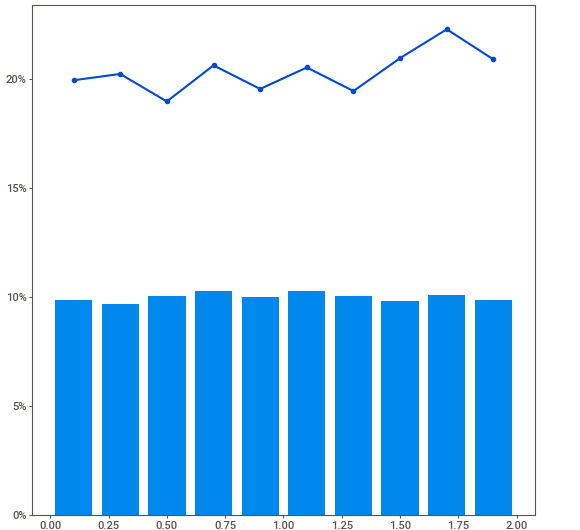
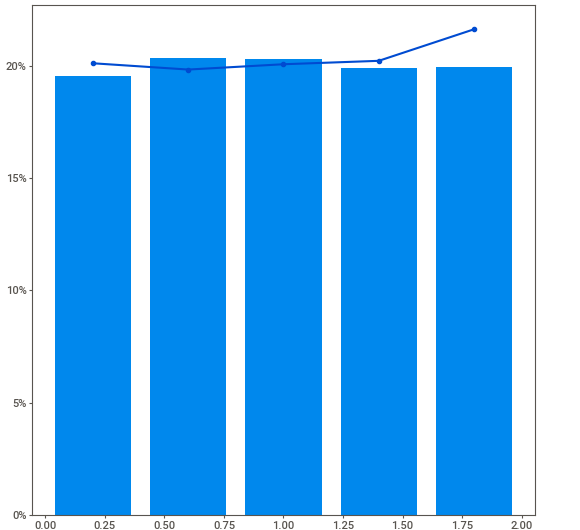
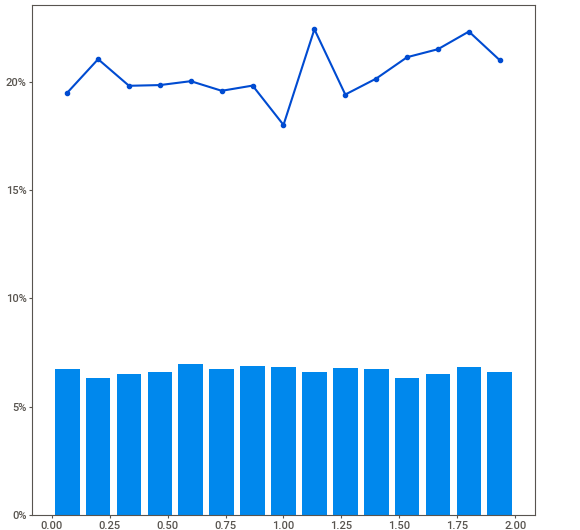
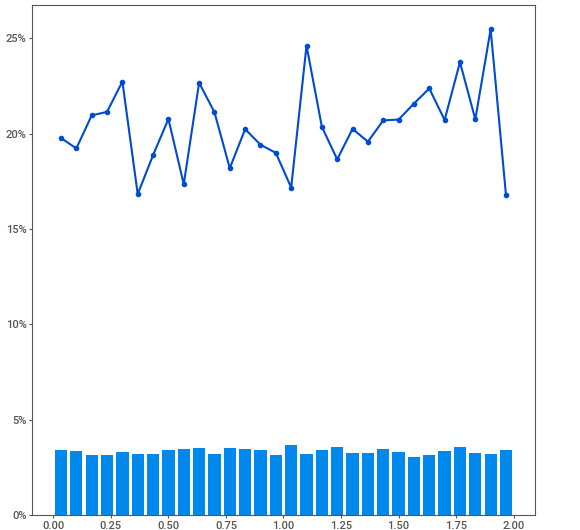
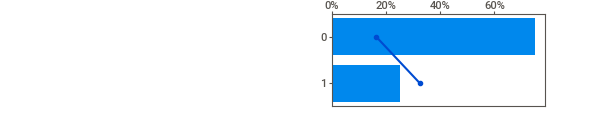
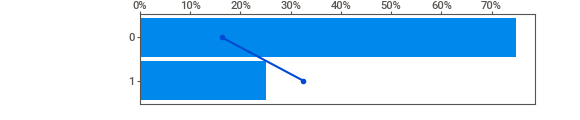
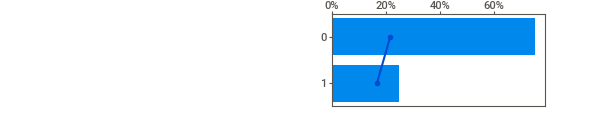
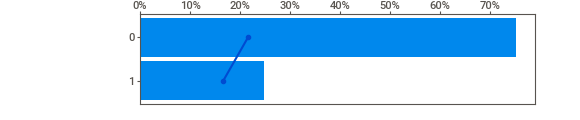
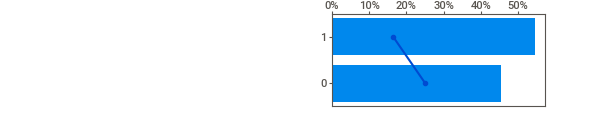
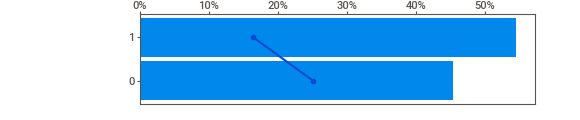
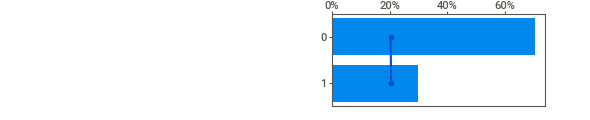
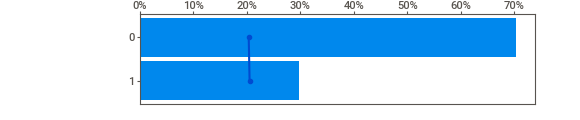
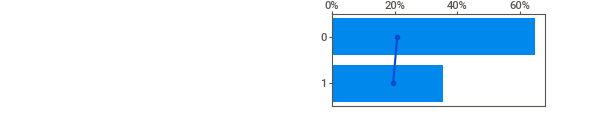
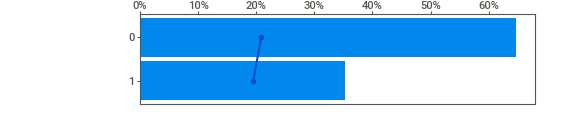
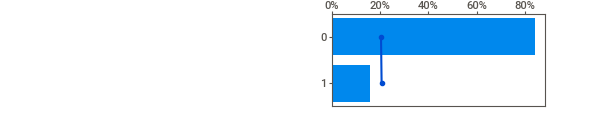
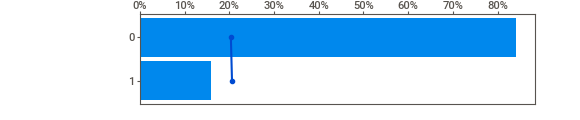
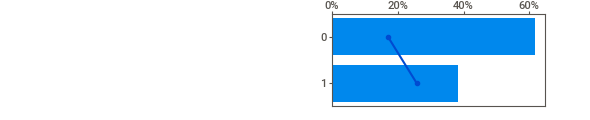
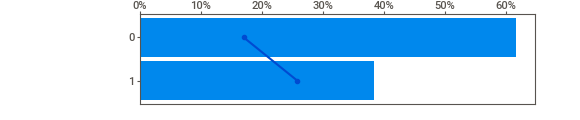
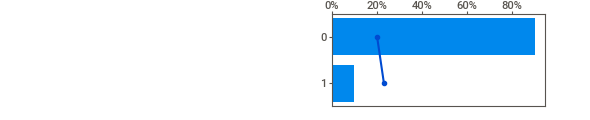
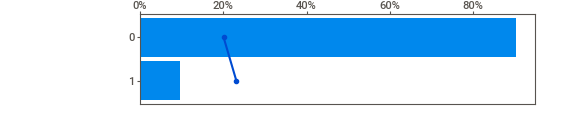
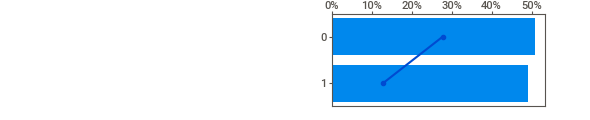
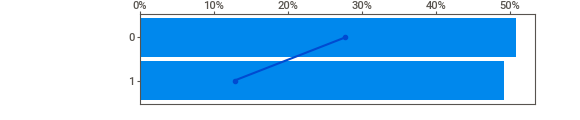
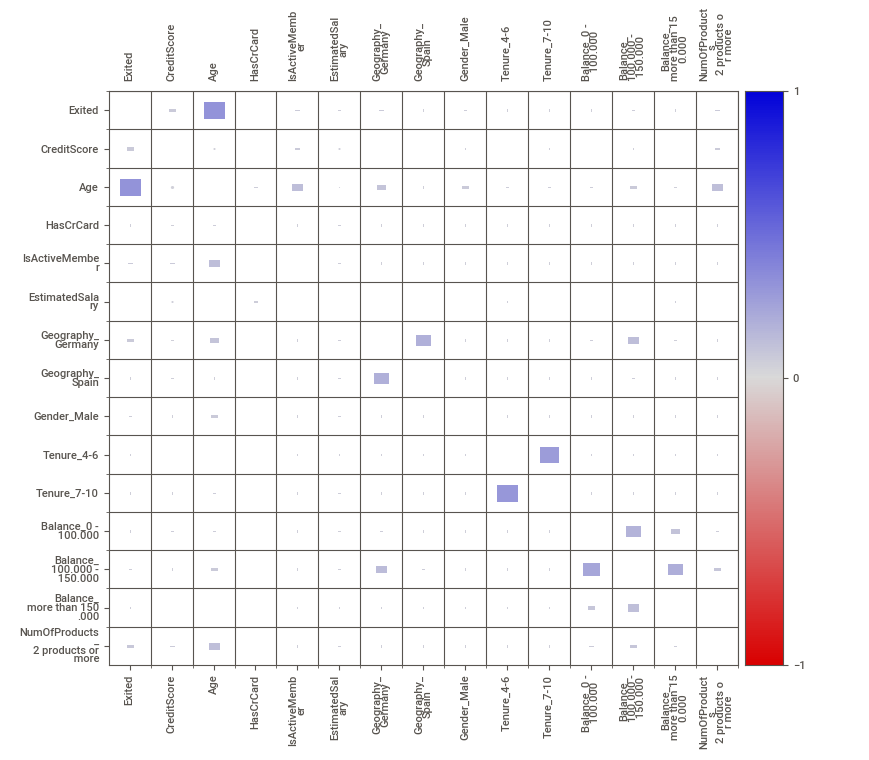
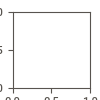

In [ ]:
eda = sv.analyze(source = data, target_feat = 'Exited')
eda.show_notebook()

##### The Analysis with Machine Learning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [ ]:
# The results:

X = data.drop('Exited', axis = 1)
y = data['Exited']

list_measures = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
name_measures = ['accuracy', 'sensitivity', 'precision', 'balanced_accuracy', 'f1-score']

list_models = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

name_models = ['Logistic Regression',
                        'Tree (depth = 3)',
                        'Tree (depth = 5)',
                        'Tree (depth = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (trees = 50, depth = 2)',
                        'Random Forest (trees = 50, depth = 3)',
                        'Random Forest (trees = 100, depth = 2)', 
                        'Random Forest (trees = 100, depth = 3)']

results0 = {}

validation = StratifiedKFold(n_splits = 10)


for i in range(len(list_models)):
    print('Running the models: ' + name_models[i])
    accs_vc = cross_validate(list_models[i], X, y, cv = validation, scoring = list_measures)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    results0[name_models[i]] = [acc, sen, vpp, f1s, bac]
    
results = pd.DataFrame(results0, index = name_measures).T

Running the models: Logistic Regression
Running the models: Tree (depth = 3)
Running the models: Tree (depth = 5)
Running the models: Tree (depth = 7)
Running the models: 5-NN
Running the models: 15-NN
Running the models: 25-NN
Running the models: Bagging
Running the models: Random Forest (trees = 50, depth = 2)
Running the models: Random Forest (trees = 50, depth = 3)
Running the models: Random Forest (trees = 100, depth = 2)
Running the models: Random Forest (trees = 100, depth = 3)


In [ ]:
results.sort_values(by = 'f1-score', ascending = False)

accuracy  ...  f1-score
Tree (depth = 7)                          0.8323  ...  0.663260
5-NN                                      0.8211  ...  0.656249
15-NN                                     0.8365  ...  0.651661
25-NN                                     0.8378  ...  0.646453
Tree (depth = 5)                          0.8355  ...  0.645736
Bagging                                   0.8212  ...  0.644427
Random Forest (trees = 50, depth = 3)     0.8417  ...  0.641042
Random Forest (trees = 100, depth = 3)    0.8412  ...  0.640727
Logistic Regression                       0.8166  ...  0.609015
Random Forest (trees = 100, depth = 2)    0.8264  ...  0.589073
Tree (depth = 3)                          0.8255  ...  0.585208
Random Forest (trees = 50, depth = 2)     0.8251  ...  0.583505

[12 rows x 5 columns]

In [ ]:

# Combination via Hard Voting

from sklearn.ensemble import VotingClassifier
 
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_15 = KNeighborsClassifier(n_neighbors = 15)
knn_25 = KNeighborsClassifier(n_neighbors = 25)
tree = DecisionTreeClassifier(max_depth = 7)
Bag = BaggingClassifier()

models = [('NN - 5', knn_5 ), ('NN - 15', knn_15 ), ('NN - 25', knn_25 ), ('Tree - 7', tree), ('Bagging', Bag)]

model = VotingClassifier(models, voting = 'hard')

measures = cross_validate(model, X, y, cv = validation, scoring = 'accuracy')
round(measures['test_score'].mean(),4)

0.8373

In [ ]:
model.fit(X, y)
data['Exited_Predicted'] = model.predict(X)

In [ ]:
data.head(10)

CreditScore       Age  ...  NumOfProducts_2 products or more  Exited_Predicted
0        0.619  0.293517  ...                                 0                 0
1        0.608  0.198164  ...                                 0                 0
2        0.502  0.293517  ...                                 1                 0
3        0.699  0.007457  ...                                 1                 0
4        0.850  0.388871  ...                                 0                 0
5        0.645  0.484225  ...                                 1                 0
6        0.822  1.056346  ...                                 1                 0
7        0.376 -0.946079  ...                                 1                 0
8        0.501  0.484225  ...                                 1                 0
9        0.684 -1.136786  ...                                 0                 0

[10 rows x 16 columns]

                                             |          | [  0%]   00:00 -> (? left)


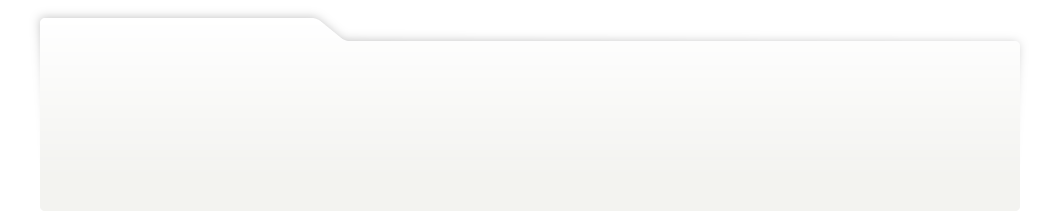
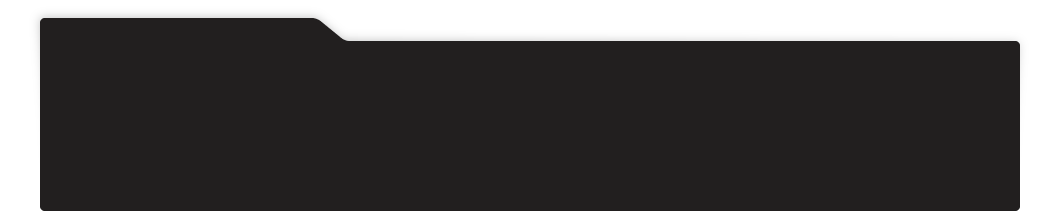
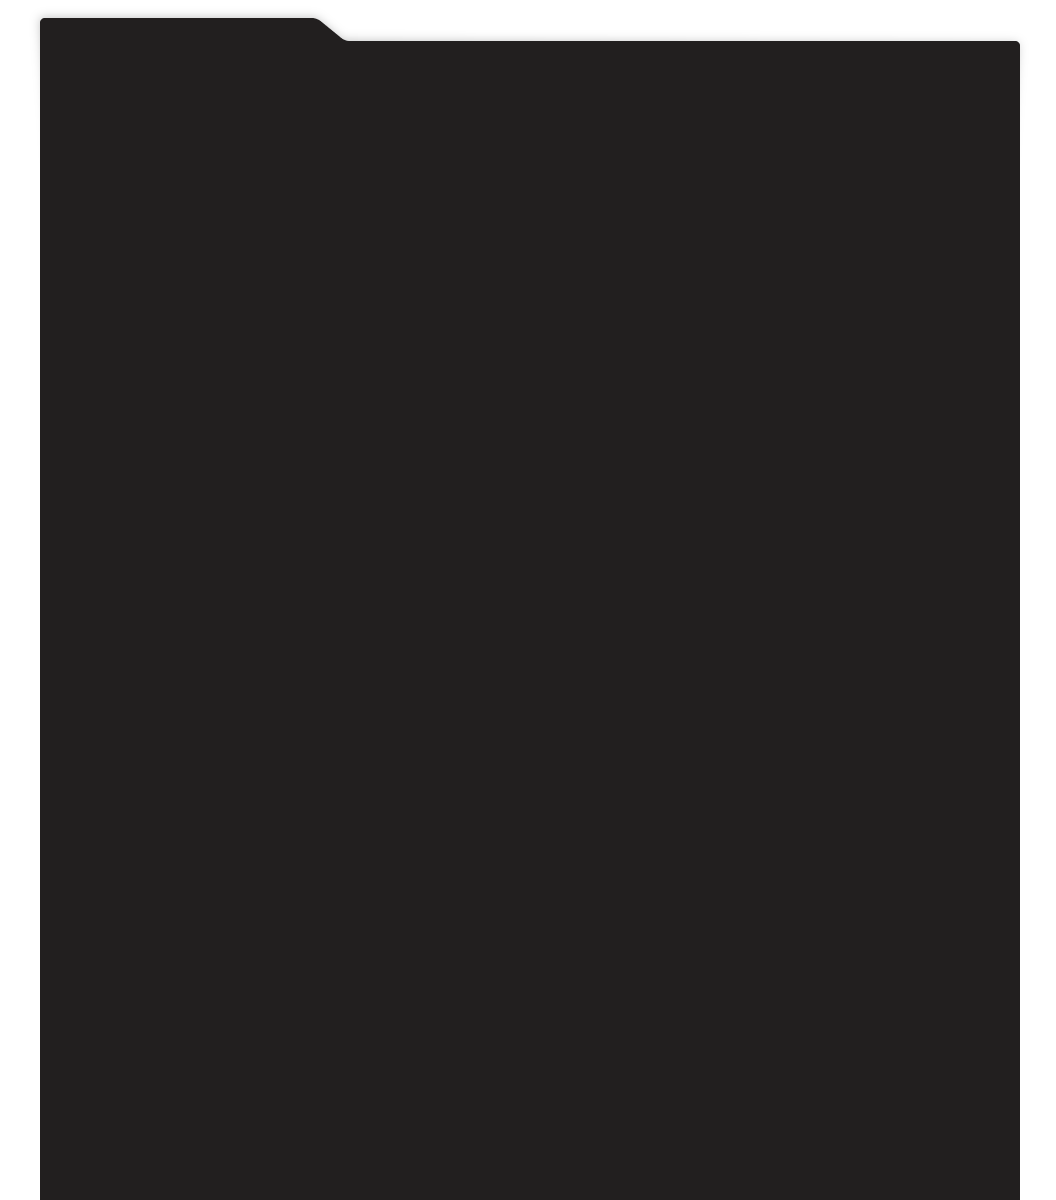
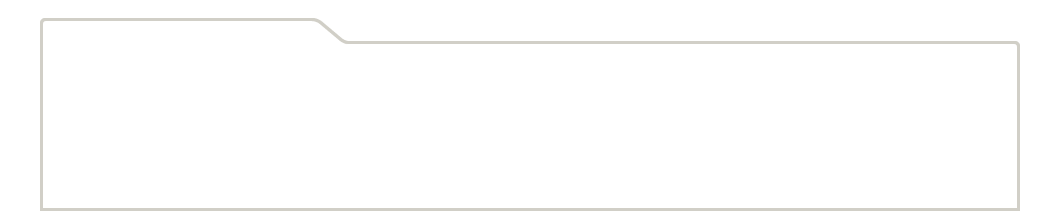
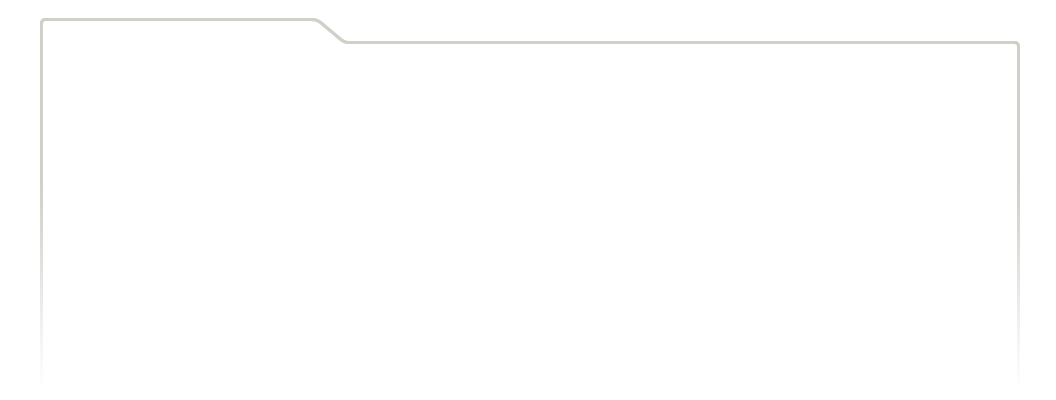
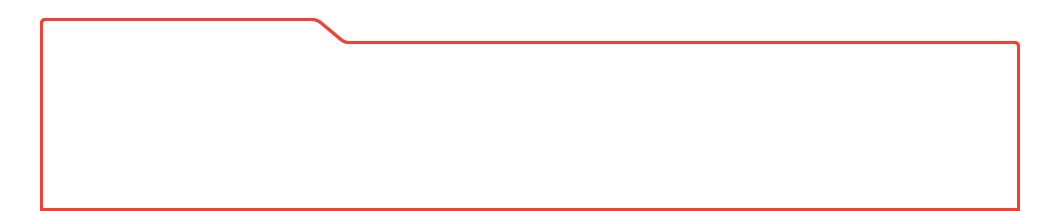
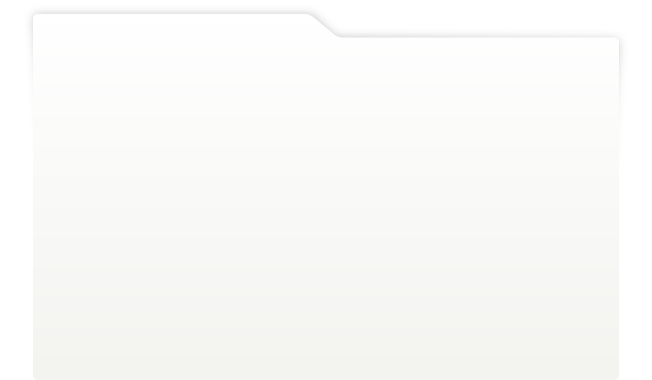
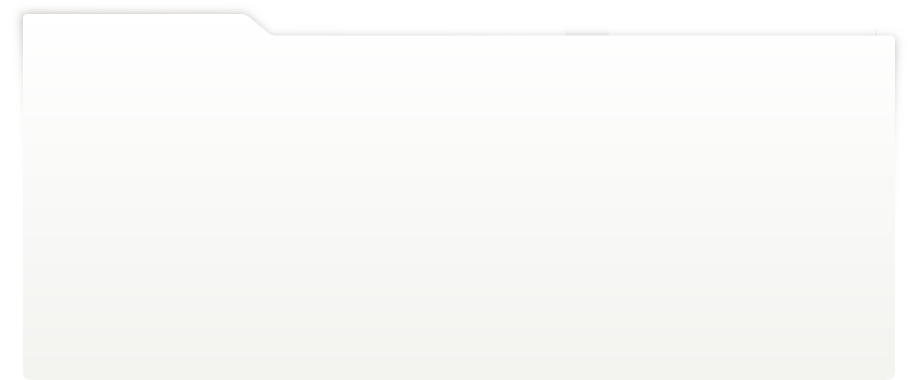
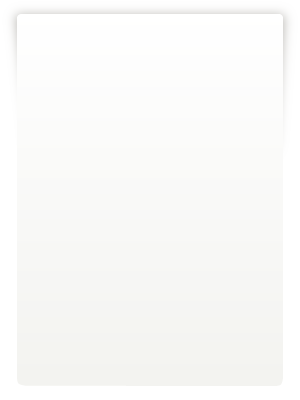
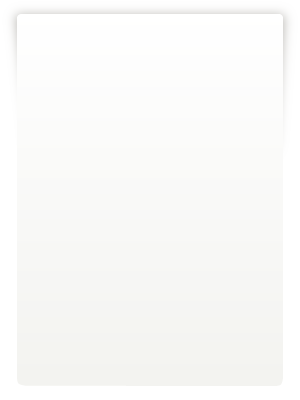
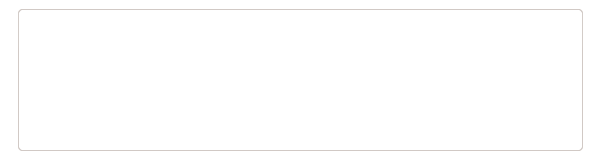
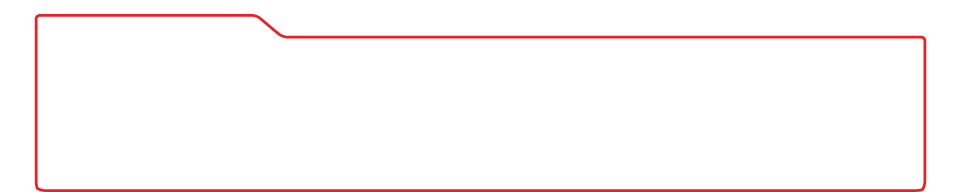
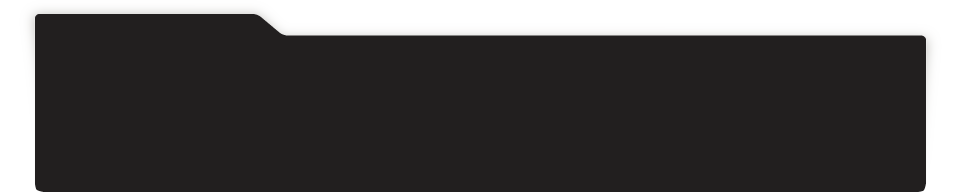
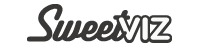
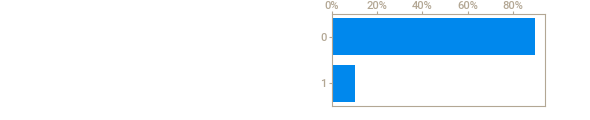
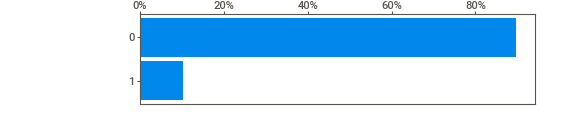
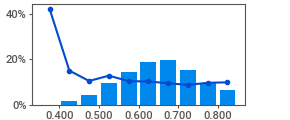
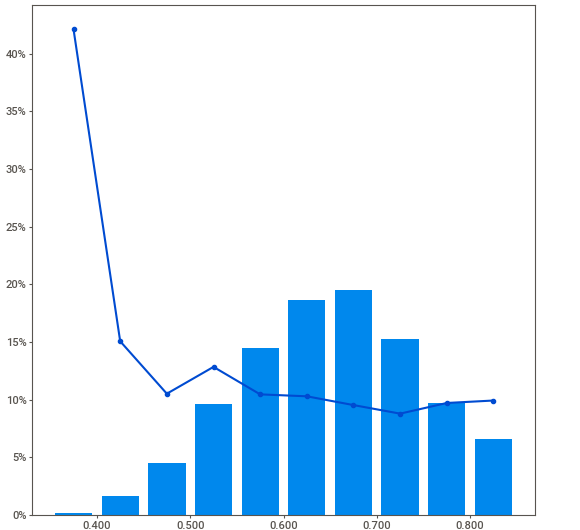
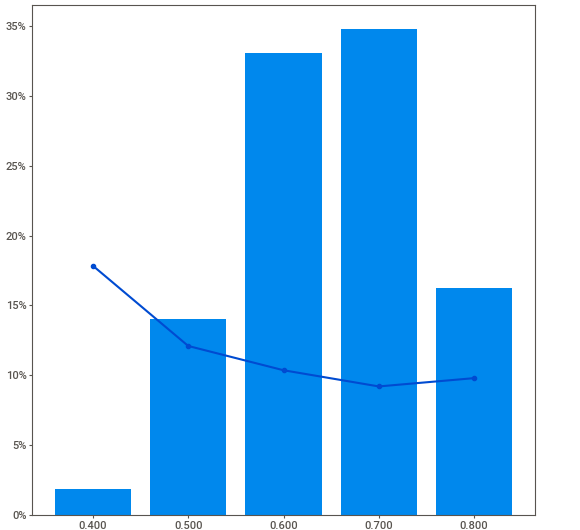
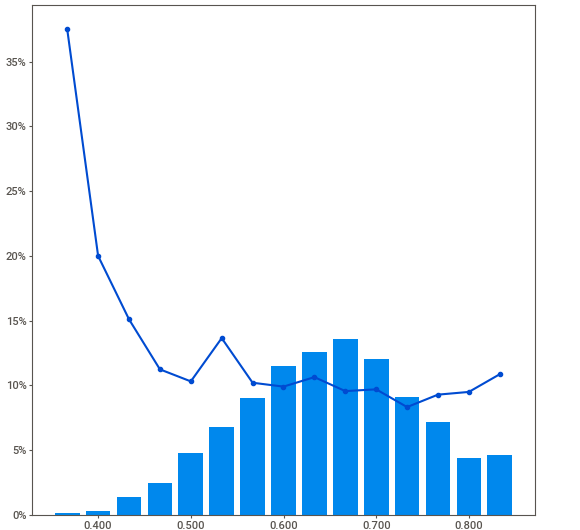
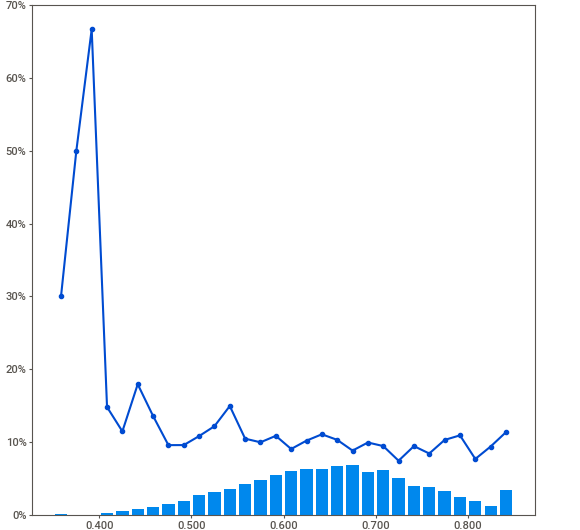
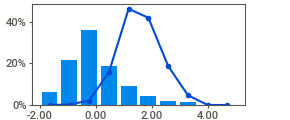
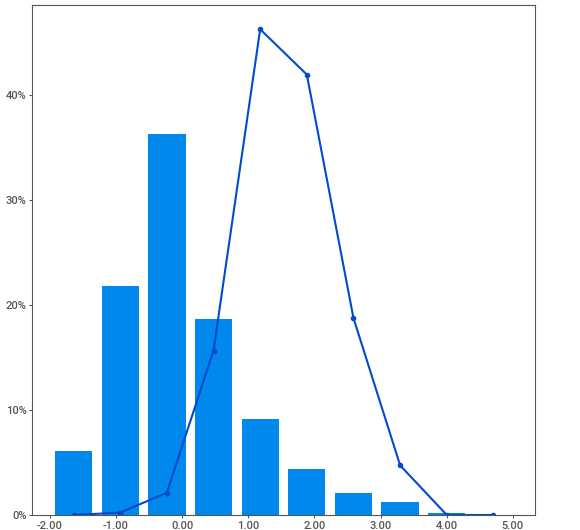
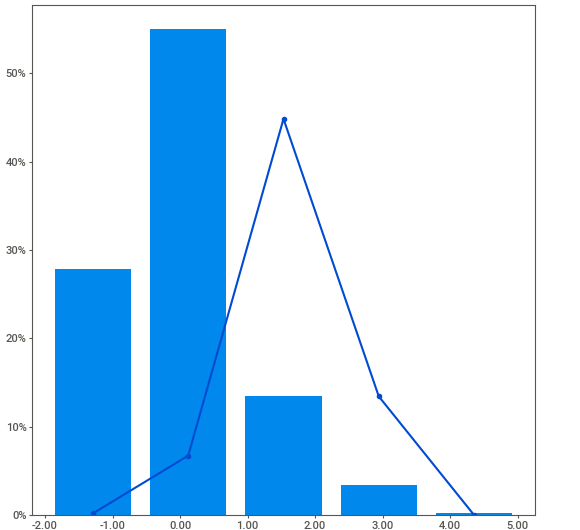
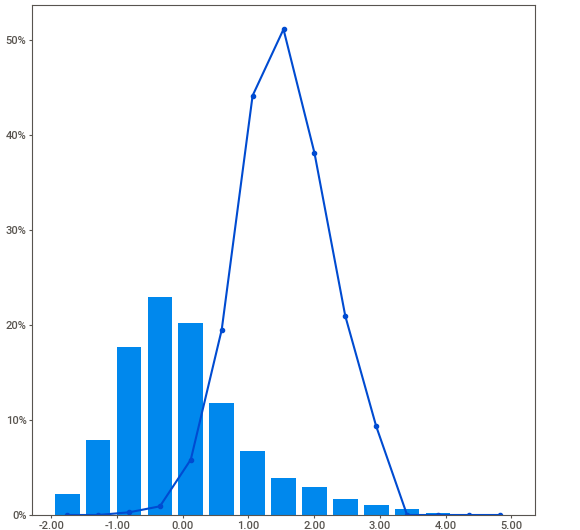
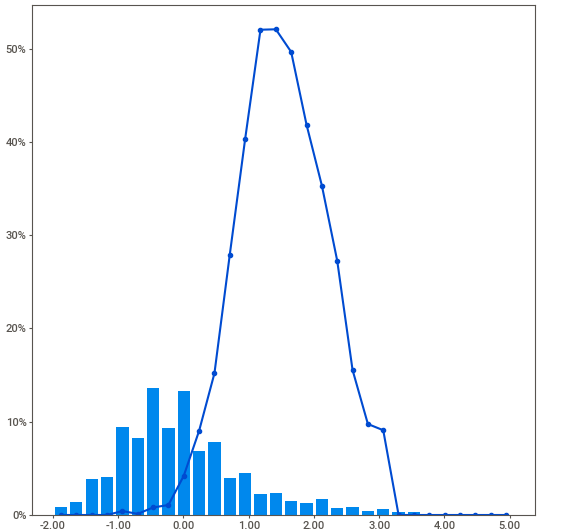
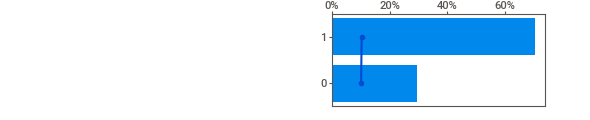
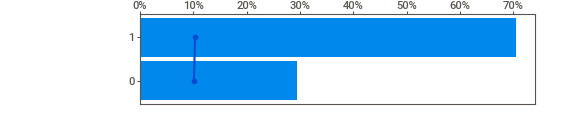
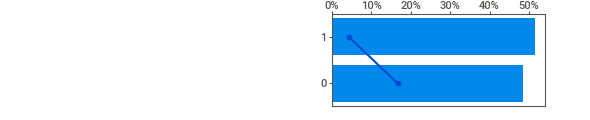
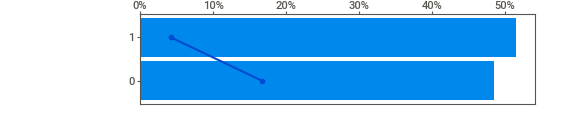
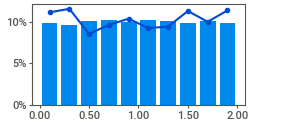
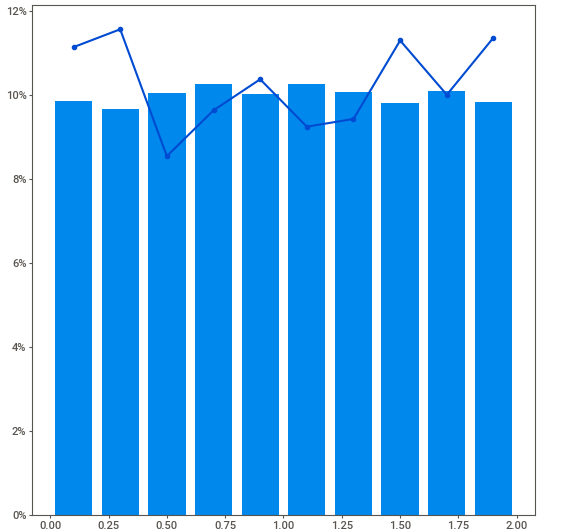
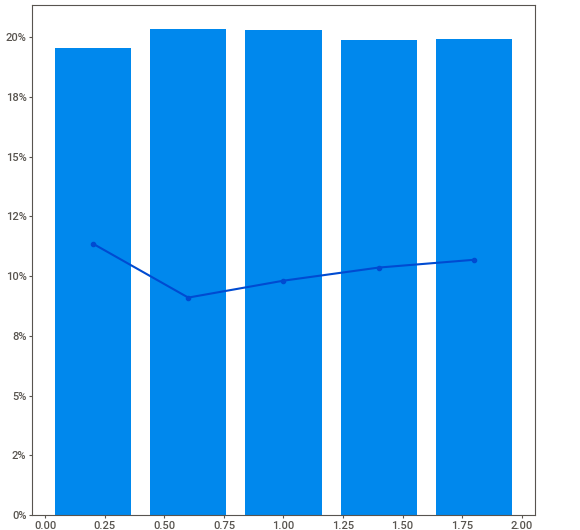
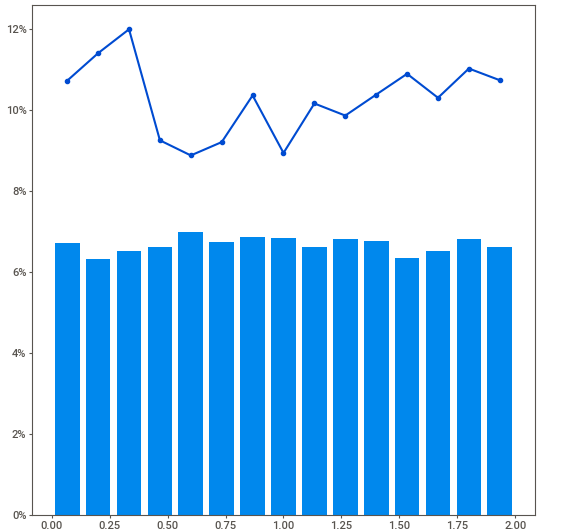
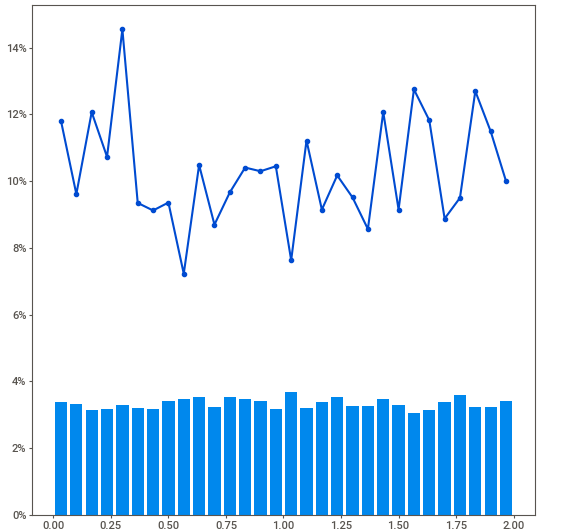
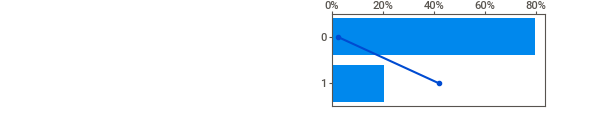
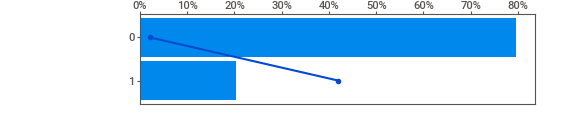
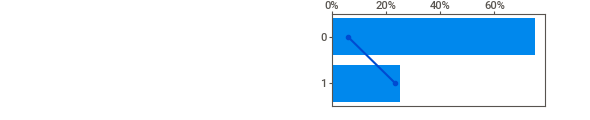
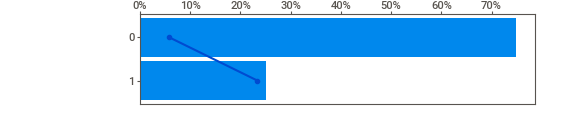
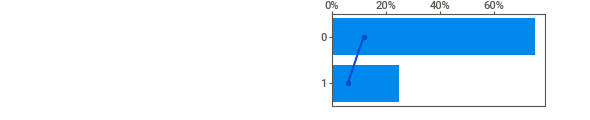
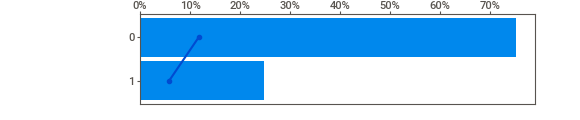
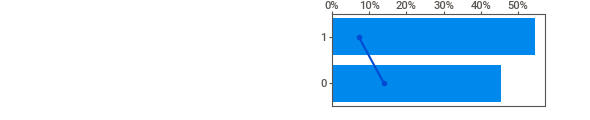
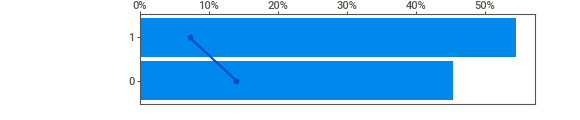
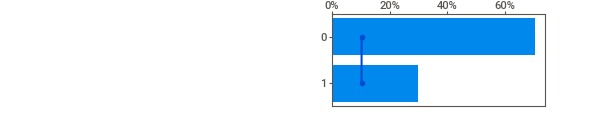
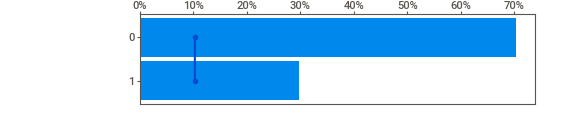
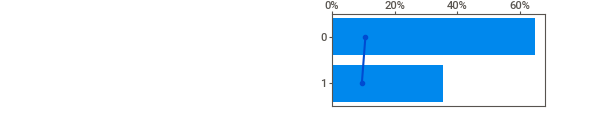
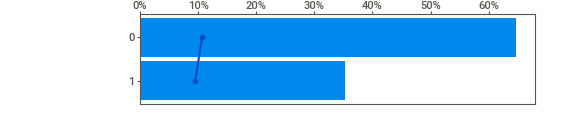
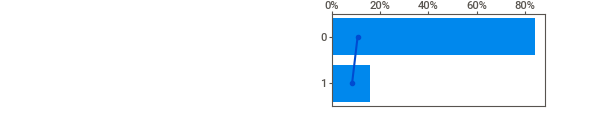
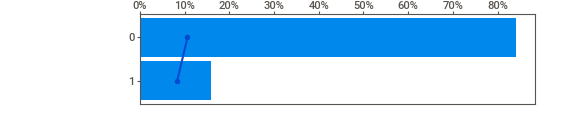
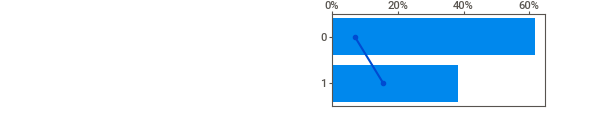
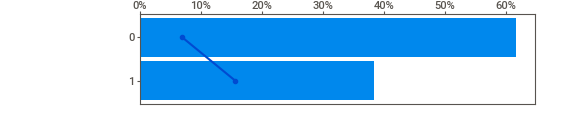
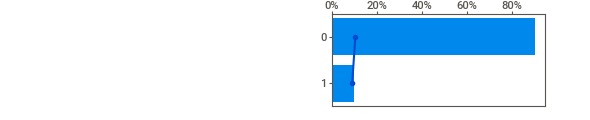
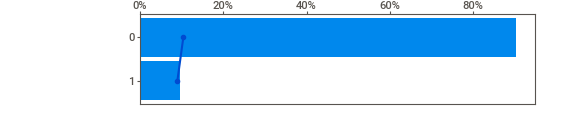
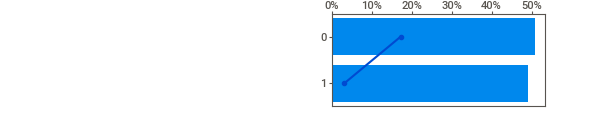
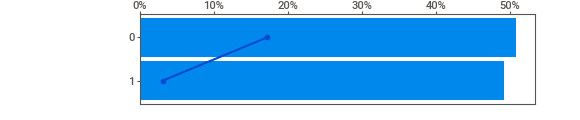
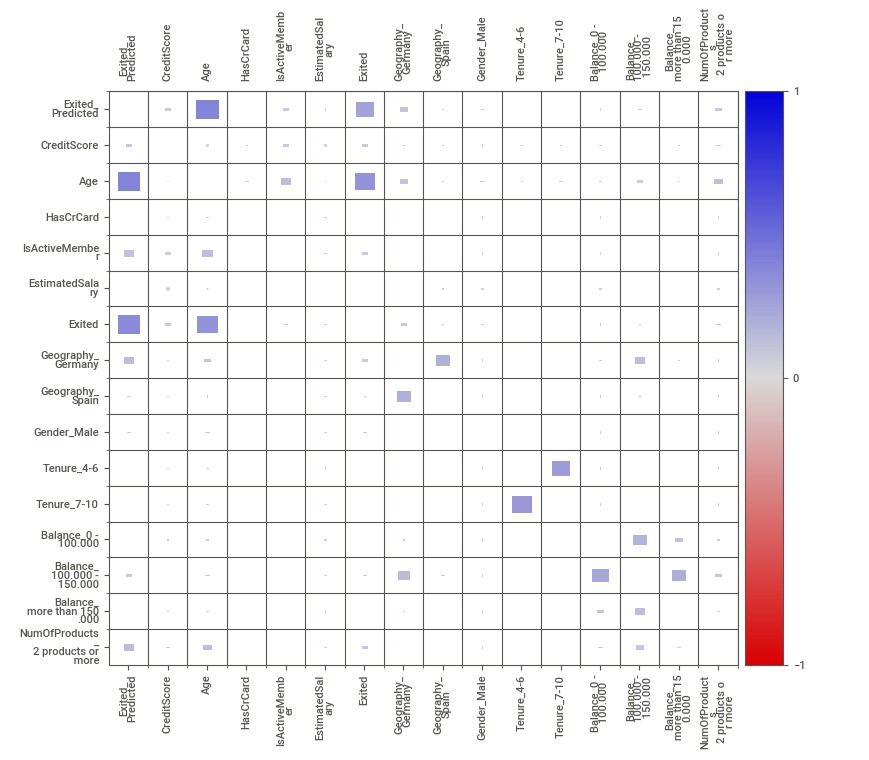
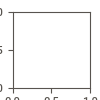

In [ ]:
eda = sv.analyze(source = data, target_feat = 'Exited_Predicted')
eda.show_notebook()

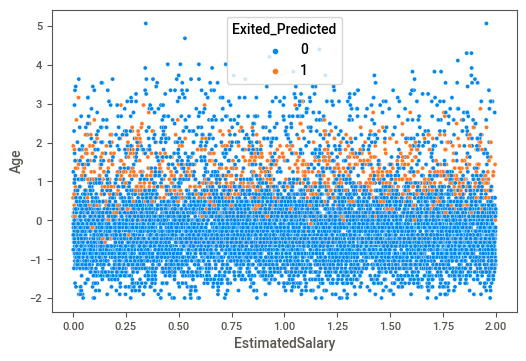

In [ ]:

import seaborn as sns

# sns.scatterplot(x = 'EstimatedSalary', y = 'Age', data = data)

sns.scatterplot(x = 'EstimatedSalary', y = 'Age', hue = 'Exited_Predicted', data = data)

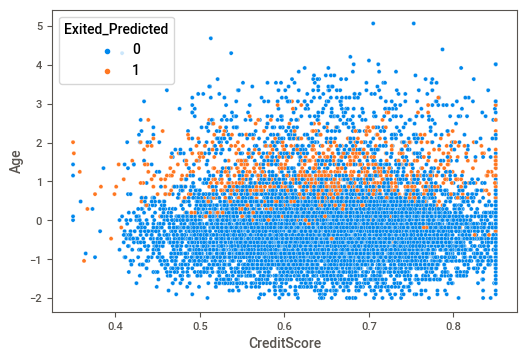

In [ ]:
# sns.scatterplot(x = 'CreditScore', y = 'Age', data = data)

sns.scatterplot(x = 'CreditScore', y = 'Age', hue = 'Exited_Predicted', data = data)

In [ ]:
# Combination via Soft Voting

from sklearn.ensemble import VotingClassifier
 
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_15 = KNeighborsClassifier(n_neighbors = 15)
knn_25 = KNeighborsClassifier(n_neighbors = 25)
tree = DecisionTreeClassifier(max_depth = 7)
Bag = BaggingClassifier()

models = [('NN - 5', knn_5 ), ('NN - 15', knn_15 ), ('NN - 25', knn_25 ), ('Tree - 7', tree), ('Bagging', Bag)]

model = VotingClassifier(models, voting = 'soft')

measures = cross_validate(model, X, y, cv = validation, scoring = 'accuracy')
round(measures['test_score'].mean(),4)

0.8112

In [ ]:
# sns.scatterplot(x = 'EstimatedSalary', y = 'Age', data = data)

sns.scatterplot(x = 'EstimatedSalary', y = 'Age', hue = 'Exited_Predicted', data = data)

In [ ]:
# sns.scatterplot(x = 'CreditScore', y = 'Age', data = data)

sns.scatterplot(x = 'CreditScore', y = 'Age', hue = 'Exited_Predicted', data = data)